In [1]:
#automatically reload stuff
%reload_ext autoreload
%autoreload 2
from SymptomPreprocessing import *
from SpatialPreprocessing import *
import Preprocessing as P
import Cluster
import Metrics
import re
import RPorts
import Utils
from warnings import simplefilter

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import f_classif, f_regression, mutual_info_regression, mutual_info_classif
from sklearn.metrics import accuracy_score,f1_score, auc, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score, recall_score, precision_score
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import chi2
import seaborn as sns
import joblib

simplefilter(action='ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
def timestamp():
    return datetime.now().strftime('%Y%d%H%M%S%f')
for i in range(10):
    print(timestamp())

202231133332249799
202231133332249863
202231133332249882
202231133332249896
202231133332249973
202231133332250042
202231133332250122
202231133332250195
202231133332250364
202231133332250389


In [3]:
rds = RadDataset()
rds.get_value_array(rds.dvh_df.columns,as_df=True)

spellchecking...
renaming things
filtering pateints
adding nan values for missing organs
adding histograms
176.0 91.77084266874341 406.1887464658043
264.0 109.22534647050192 407.1108350538819


,Esophagus_D80,Esophagus_D5,Esophagus_D75,Esophagus_V35,Esophagus_V50,Esophagus_V30,Esophagus_volume,Esophagus_min_dose,Esophagus_V5,Esophagus_D10,...,Glottic_Area_level_0,Glottic_Area_D25,Glottic_Area_D98,Glottic_Area_D97,Glottic_Area_D60,Glottic_Area_V40,Glottic_Area_D95,Glottic_Area_D2,Glottic_Area_D55,Glottic_Area_D45
id,,,,,,,,,,,,,,,,,,,,,
2.0,29.187500,53.218750,31.812500,59.875000,14.367188,78.937500,14279.479980,2.97,96.375000,51.625000,...,12.0,30.906250,15.718750,15.796875,20.171875,9.726562,15.929688,48.562500,21.109375,23.953125
6.0,6.699219,46.125000,17.093750,62.125000,0.177246,70.312500,6974.945068,1.84,84.875000,44.968750,...,52.0,34.656250,28.296875,28.437500,31.640625,9.710938,28.734375,45.031250,31.921875,32.593750
7.0,5.000000,38.687500,6.578125,20.671875,0.000000,49.062500,14724.426270,1.00,80.062500,37.625000,...,86.0,29.906250,27.406250,27.421875,28.703125,0.000000,27.500000,31.312500,28.781250,29.062500
8.0,6.691406,32.781250,7.281250,0.000000,0.000000,29.531250,10428.309631,3.52,95.437500,32.156250,...,126.0,15.312500,6.738281,7.179688,11.890625,0.000000,7.308594,28.234375,13.140625,14.000000
9.0,22.515625,54.468750,24.453125,45.406250,12.492188,59.406250,10291.442871,13.58,100.000000,51.437500,...,9.0,21.531250,5.671875,5.710938,6.519531,0.000000,5.750000,31.578125,6.839844,15.671875
10.0,7.660156,45.718750,10.156250,41.500000,0.477051,56.812500,16405.334473,3.07,91.562500,44.218750,...,222.0,53.656250,26.453125,27.171875,39.031250,54.187500,28.234375,66.562500,39.750000,42.343750
11.0,6.730469,26.812500,6.921875,0.000000,0.000000,0.000000,7168.579102,5.94,100.000000,26.156250,...,256.0,18.234375,7.679688,7.921875,11.070312,0.000000,8.453125,34.250000,11.390625,12.609375
12.0,0.700195,3.900391,0.770020,0.000000,0.000000,0.000000,9522.438049,1.00,0.981445,3.279297,...,302.0,12.781250,1.509766,1.519531,2.199219,0.000000,1.549805,33.000000,2.390625,6.101562
13.0,14.031250,42.656250,28.234375,69.500000,0.000000,74.437500,17826.557159,1.00,86.437500,42.218750,...,336.0,15.046875,6.210938,6.351562,9.679688,0.000000,6.550781,26.937500,10.070312,10.796875


In [205]:
def add_dose_limits(df,organ_list=None):
    #dose limits as binary values from https://applications.emro.who.int/imemrf/Rep_Radiother_Oncol/Rep_Radiother_Oncol_2013_1_1_35_48.pdf
    #not inlcudeing other stuff like eyes at this time
    #also, my max dose is weird so I'm using V10 for that because I feel like that makes sense
    #using the 
    if organ_list is None:
        organ_list = Const.organ_list[:]
    df = df.copy()
    original_cols = set(df.columns)
    getval = lambda organ,param: df[param].apply(lambda x: x[organ_list.index(organ)])
    get_lr_val = lambda organ,param: np.maximum(getval('Lt_'+organ,param),getval('Rt_'+organ,param))
    
    maxdose_var = 'max_dose'
    #symptomatic necrosis
    df['Brainstem_limit'] = (getval('Brainstem','D2') > 59) | (getval('Brainstem','D99') > 54)
    
    #myelopathy
    df['Spinal_Cord_limit'] = getval('Spinal_Cord',maxdose_var) > 50
    
    #xerostomia. >25 for 1 or >20 for both
    df['Parotid_Gland_limit'] = (get_lr_val('Parotid_Gland','mean_dose') > 20) | (getval('Lt_Parotid_Gland','mean_dose') > 25) | (getval('Rt_Parotid_Gland','mean_dose') > 25)
    
    #there is 50 for PEG tube and 60 for aspiration so i'll do 50
    for o in ['IPC','MPC',"SPC"]:
        df[o+"_limit"] = getval(o,'mean_dose') > 50
        df[o+"_limit2"] = getval(o,'mean_dose') > 60
    
    #ORN?
    df['Mandible_limit'] = getval('Mandible',maxdose_var) > 70
    
    #edema
    df['Larynx_limit'] = getval('Larynx','V50') > 27
    
    #Nerve damage
    df['Brachial_Plexus_limit'] = get_lr_val('Brachial_Plexus',maxdose_var) > 60
    
    #Esophagitus
    elimits = [('V35',50),('V50',40),('V70',20),('V60',30)]
    df['Esophagus_limit'] = np.stack([(getval('Esophagus',v) > lim) for v,lim in elimits]).sum(axis=0) > 0
    
#     print(df[[c for c in df.columns if  c not in original_cols]].sum())
    return df

def rds_to_df(rds,use_lstm=False):
    sd_df = P.get_merged_symp_dose_df(rds,roll_up=True,use_lstm=use_lstm)
#     sd_df = P.get_symptoms_max(sd_df)
    sd_df =  P.add_sd_dose_clusters(sd_df)
#     sd_df = P.add_sd_symptom_clusters(sd_df)
    sd_df = add_dose_limits(sd_df)
    return sd_df

sddf = rds_to_df(rds)
sddf = P.add_sd_dose_clusters(sddf)
sddf

before drop count 823
after drop count 537
error (%) 0.8223393833485576
[('severe_6wk_symptoms', 0.00931098696461825), ('severe_late_symptoms', 0.0148975791433892), ('moderate_6wk_symptoms', 0.0521415270018622), ('moderate_late_symptoms', 0.04655493482309125), ('mild_6wk_symptoms', 0.19553072625698323), ('mild_late_symptoms', 0.16945996275605213)]
dose ids: 484 syptom ids: 537 merged ids: 350


,D10,D15,D2,D20,D25,D30,D35,D40,D45,D5,...,IPC_limit,IPC_limit2,MPC_limit,MPC_limit2,SPC_limit,SPC_limit2,Mandible_limit,Larynx_limit,Brachial_Plexus_limit,Esophagus_limit
id,,,,,,,,,,,,,,,,,,,,,
7,"[37.625, 37.15625, 66.3125, 60.3125, 49.4375, ...","[36.5625, 36.75, 64.0625, 59.96875, 48.375, 49...","[39.96875, 38.0625, 71.8125, 60.90625, 52.1562...","[35.25, 36.34375, 62.71875, 59.71875, 47.34375...","[34.0625, 35.90625, 61.53125, 59.40625, 46.562...","[33.125, 35.5, 60.34375, 59.1875, 45.6875, 43....","[32.28125, 35.03125, 59.03125, 58.90625, 44.75...","[31.609375, 34.625, 57.71875, 58.625, 43.96875...","[30.84375, 34.1875, 56.40625, 58.3125, 43.1875...","[38.6875, 37.625, 71.0625, 60.625, 50.75, 53.8...",...,True,False,True,False,True,False,True,False,True,False
8,"[32.15625, 32.0625, 65.375, 56.6875, 22.5, 31....","[31.703125, 31.109375, 63.34375, 55.75, 21.312...","[33.4375, 34.09375, 68.75, 58.28125, 33.6875, ...","[31.203125, 30.25, 61.34375, 54.5625, 17.84375...","[30.609375, 29.40625, 60.03125, 52.375, 14.367...","[29.9375, 28.390625, 59.5, 50.5625, 13.140625,...","[28.96875, 27.453125, 58.96875, 49.46875, 11.7...","[27.1875, 26.46875, 58.53125, 48.59375, 11.203...","[24.875, 25.453125, 58.125, 48.0, 10.9609375, ...","[32.78125, 33.125, 67.375, 57.65625, 25.3125, ...",...,True,False,True,True,True,True,True,True,True,False
9,"[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[48.59375, 26.671875, 48.59375, 48.59375, 15.0...","[56.65625, 29.5625, 56.65625, 56.65625, 27.312...","[46.03125, 25.9375, 46.03125, 46.03125, 13.0, ...","[43.53125, 25.296875, 43.53125, 43.53125, 11.3...","[41.28125, 24.671875, 41.28125, 41.28125, 10.3...","[39.15625, 24.046875, 39.15625, 39.15625, 9.82...","[37.0, 23.359375, 37.0, 37.0, 9.4609375, 11.28...","[35.125, 22.625, 35.125, 35.125, 9.109375, 9.3...","[54.46875, 28.625, 54.46875, 54.46875, 23.3125...",...,False,False,False,False,False,False,False,False,False,False
10,"[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[43.1875, 34.28125, 62.6875, 54.3125, 50.78125...","[47.84375, 39.21875, 68.5625, 58.15625, 57.406...","[42.0, 33.125, 59.53125, 52.84375, 48.875, 46....","[40.71875, 32.34375, 58.65625, 51.4375, 47.343...","[38.90625, 31.625, 58.3125, 50.0, 46.5, 44.687...","[36.875, 30.921875, 57.8125, 48.75, 46.125, 43...","[35.5625, 30.1875, 56.6875, 47.6875, 45.75, 43...","[33.96875, 29.4375, 55.03125, 46.4375, 45.3125...","[45.71875, 37.34375, 66.6875, 57.46875, 55.25,...",...,True,True,True,True,True,True,True,True,True,False
11,"[26.15625, 31.984375, 57.125, 45.40625, 29.265...","[25.625, 31.359375, 56.875, 45.15625, 26.48437...","[27.5625, 33.25, 57.65625, 45.84375, 36.75, 44...","[25.09375, 30.71875, 56.65625, 45.0, 22.828125...","[22.625, 30.15625, 56.46875, 44.8125, 19.85937...","[19.75, 29.65625, 56.21875, 44.625, 17.640625,...","[14.1484375, 29.234375, 55.9375, 44.46875, 15....","[11.09375, 28.84375, 55.6875, 44.21875, 14.210...","[9.1015625, 28.46875, 55.4375, 44.03125, 12.53...","[26.8125, 32.71875, 57.40625, 45.625, 33.03125...",...,True,False,True,False,True,False,True,False,False,False
13,"[42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...","[41.8125, 29.046875, 58.34375, 48.15625, 14.52...","[43.0, 31.0, 70.625, 54.09375, 35.5625, 51.0, ...","[41.40625, 28.46875, 56.4375, 47.8125, 12.9921...","[41.03125, 27.859375, 54.5, 47.59375, 10.29687...","[40.65625, 27.234375, 52.78125, 47.375, 9.3593...","[40.3125, 26.359375, 50.9375, 47.1875, 8.67187...","[39.90625, 25.09375, 49.4375, 47.0, 8.3984375,...","[39.4375, 24.015625, 48.21875, 46.8125, 7.6484...","[42.65625, 30.375, 65.375, 52.125, 25.234375, ...",...,False,False,True,True,True,True,True,False,True,True
15,"[44.90625, 33.28125, 57.71875, 47.75, 43.625, ...","[44.0, 32.75, 57.21875, 47.5625, 40.40625, 48....","[46.5, 34.9375, 58.71875, 48.375, 46.875, 51.9...","[43.0625, 32.28125, 56.625, 47.375, 37.15625, ...","[42.03125, 31.8125, 56.03125, 47.25, 31.1875, ...","[41.03125, 31.046875, 55.1875, 47.125, 21.9843...","[4

In [208]:
#seperate version using all the patients using the data imputed by guadalupe
lstmdf = rds_to_df(rds,use_lstm=True)
lstmdf = P.add_sd_dose_clusters(lstmdf)
lstmdf

before drop count 823
after drop count 823
[('severe_6wk_symptoms', 0.013365735115431349), ('severe_late_symptoms', 0.019441069258809233), ('moderate_6wk_symptoms', 0.05103280680437424), ('moderate_late_symptoms', 0.0583232077764277), ('mild_6wk_symptoms', 0.21142162818955043), ('mild_late_symptoms', 0.17739975698663427)]
dose ids: 484 syptom ids: 823 merged ids: 484


,D10,D15,D2,D20,D25,D30,D35,D40,D45,D5,...,IPC_limit,IPC_limit2,MPC_limit,MPC_limit2,SPC_limit,SPC_limit2,Mandible_limit,Larynx_limit,Brachial_Plexus_limit,Esophagus_limit
id,,,,,,,,,,,,,,,,,,,,,
2,"[51.625, 26.890625, 56.1875, 53.625, 53.75, 57...","[49.78125, 26.515625, 54.6875, 52.21875, 52.96...","[54.53125, 28.1875, 59.84375, 57.40625, 55.937...","[47.09375, 25.875, 53.09375, 50.875, 52.4375, ...","[44.4375, 25.453125, 51.375, 49.75, 52.03125, ...","[42.53125, 25.078125, 49.71875, 48.6875, 51.65...","[41.03125, 24.703125, 48.03125, 47.75, 51.3125...","[39.78125, 24.375, 46.46875, 46.625, 51.0, 51....","[38.4375, 24.125, 44.875, 45.6875, 50.5625, 51...","[53.21875, 27.4375, 58.28125, 55.5, 54.90625, ...",...,False,False,True,True,True,True,True,False,True,True
6,"[44.96875, 26.40625, 61.71875, 56.78125, 55.18...","[44.03125, 25.84375, 58.75, 55.9375, 52.40625,...","[48.0625, 28.03125, 65.5625, 58.3125, 61.28125...","[42.78125, 25.40625, 56.71875, 54.875, 50.4687...","[41.4375, 25.03125, 55.46875, 53.625, 49.5625,...","[40.375, 24.65625, 53.4375, 52.375, 49.0, 50.0...","[39.59375, 24.3125, 51.65625, 51.125, 47.8125,...","[39.09375, 24.0, 50.09375, 49.84375, 46.5625, ...","[38.625, 23.671875, 48.53125, 48.75, 45.59375,...","[46.125, 27.1875, 63.8125, 57.5, 58.375, 58.31...",...,False,False,True,False,True,True,True,False,True,True
7,"[37.625, 37.15625, 66.3125, 60.3125, 49.4375, ...","[36.5625, 36.75, 64.0625, 59.96875, 48.375, 49...","[39.96875, 38.0625, 71.8125, 60.90625, 52.1562...","[35.25, 36.34375, 62.71875, 59.71875, 47.34375...","[34.0625, 35.90625, 61.53125, 59.40625, 46.562...","[33.125, 35.5, 60.34375, 59.1875, 45.6875, 43....","[32.28125, 35.03125, 59.03125, 58.90625, 44.75...","[31.609375, 34.625, 57.71875, 58.625, 43.96875...","[30.84375, 34.1875, 56.40625, 58.3125, 43.1875...","[38.6875, 37.625, 71.0625, 60.625, 50.75, 53.8...",...,True,False,True,False,True,False,True,False,True,False
8,"[32.15625, 32.0625, 65.375, 56.6875, 22.5, 31....","[31.703125, 31.109375, 63.34375, 55.75, 21.312...","[33.4375, 34.09375, 68.75, 58.28125, 33.6875, ...","[31.203125, 30.25, 61.34375, 54.5625, 17.84375...","[30.609375, 29.40625, 60.03125, 52.375, 14.367...","[29.9375, 28.390625, 59.5, 50.5625, 13.140625,...","[28.96875, 27.453125, 58.96875, 49.46875, 11.7...","[27.1875, 26.46875, 58.53125, 48.59375, 11.203...","[24.875, 25.453125, 58.125, 48.0, 10.9609375, ...","[32.78125, 33.125, 67.375, 57.65625, 25.3125, ...",...,True,False,True,True,True,True,True,True,True,False
9,"[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[48.59375, 26.671875, 48.59375, 48.59375, 15.0...","[56.65625, 29.5625, 56.65625, 56.65625, 27.312...","[46.03125, 25.9375, 46.03125, 46.03125, 13.0, ...","[43.53125, 25.296875, 43.53125, 43.53125, 11.3...","[41.28125, 24.671875, 41.28125, 41.28125, 10.3...","[39.15625, 24.046875, 39.15625, 39.15625, 9.82...","[37.0, 23.359375, 37.0, 37.0, 9.4609375, 11.28...","[35.125, 22.625, 35.125, 35.125, 9.109375, 9.3...","[54.46875, 28.625, 54.46875, 54.46875, 23.3125...",...,False,False,False,False,False,False,False,False,False,False
10,"[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[43.1875, 34.28125, 62.6875, 54.3125, 50.78125...","[47.84375, 39.21875, 68.5625, 58.15625, 57.406...","[42.0, 33.125, 59.53125, 52.84375, 48.875, 46....","[40.71875, 32.34375, 58.65625, 51.4375, 47.343...","[38.90625, 31.625, 58.3125, 50.0, 46.5, 44.687...","[36.875, 30.921875, 57.8125, 48.75, 46.125, 43...","[35.5625, 30.1875, 56.6875, 47.6875, 45.75, 43...","[33.96875, 29.4375, 55.03125, 46.4375, 45.3125...","[45.71875, 37.34375, 66.6875, 57.46875, 55.25,...",...,True,True,True,True,True,True,True,True,True,False
11,"[26.15625, 31.984375, 57.125, 45.40625, 29.265...","[25.625, 31.359375, 56.875, 45.15625, 26.48437...","[27.5625, 33.25, 57.65625, 45.84375, 36.75, 44...","[25.09375, 30.71875, 56.65625, 45.0, 22.828125...","[22.625, 30.15625, 56.46875, 44.8125, 19.85937...","[19.75, 29.65625, 56.21875, 44.625, 17.640625,...","[14.14

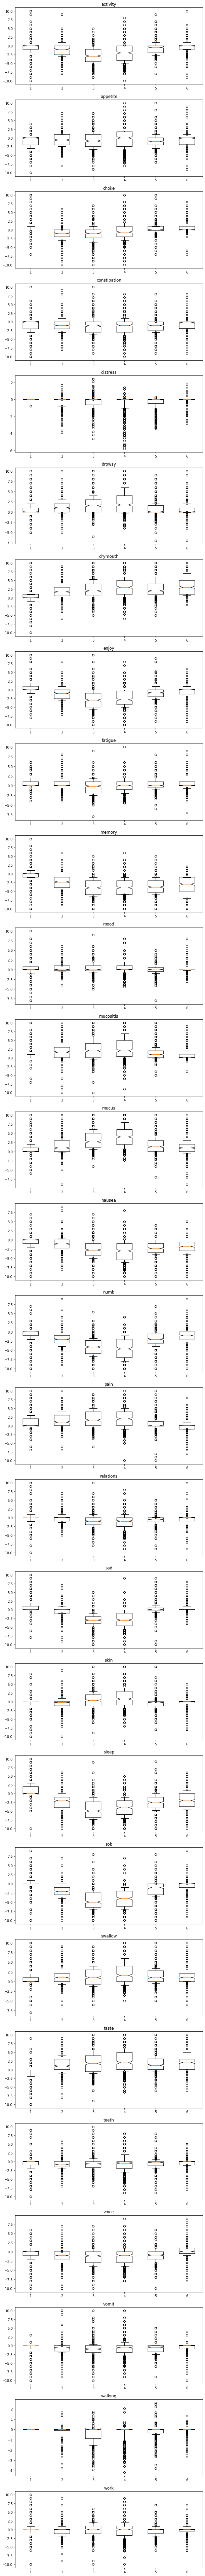

In [240]:
def compare_impute_methods(df1,df2,dates=None,**kwargs):
    #Im 
    if dates is None:
        dates = [0,3,6,7,13,33]
    datelocs = np.array([i for i,d in enumerate( df1.dates.iloc[0]) if d in dates])
    names = df_symptom_names(df1,use_groups=False,use_domains=False)
    a1 = P.df_to_symptom_array(df1,use_groups=False)
    a2 = P.df_to_symptom_array(df2.loc[df1.index],use_groups=False)
    
    a1 = a1[:,:,datelocs]
    a2 = a2[:,:,datelocs]
    diff =a1-a2
    xaxis = [i for i in range(diff.shape[-1])]
    n_symptoms = a1.shape[1]
    fig,axes = plt.subplots(n_symptoms,1,figsize=(10,5*len(names)))
    for col in range(n_symptoms):
        sname = names[col].replace('symptoms_','')
        axis = axes[col]
        axis.set_title(names[col].replace('symptoms_',''))
        x = diff[:,col,:]
        axis.boxplot(x,notch=True,whis=(15,85))
compare_impute_methods(sddf,lstmdf)

In [209]:
def get_lr_dose(df,key='mean_dose'):
    left_organs = [Const.organ_list.index(c) for c in Const.organ_list if 'Lt_' in c]
    right_organs= [Const.organ_list.index(c) for c in Const.organ_list if 'Rt_' in c]
    left = df[key].apply(lambda x: np.sum([x[i] for i in left_organs]))
    right = df[key].apply(lambda x: np.sum([x[i] for i in right_organs]))
    return left > right
[get_lr_dose(sddf).mean(),get_lr_dose(lstmdf).mean()]

[0.96, 0.9566115702479339]

In [6]:
def add_pscore(df,treatment,covariates,
               model=None,
               use_cv=False):
    x = df[treatment].values
    z = np.stack(df[covariates].apply(lambda x: np.stack([np.array(xx) for xx in x])).values)
    pp = predict_propensity(x,z,model=model,use_cv=use_cv)
    df = df.copy()
    df.loc[:,'propensity'] = pp['pscore']
    return df

def predict_cv(model,x,y,cvsize=None):
    #currently leave-one-out
    predictions = []
    y = y.reshape(-1,1)
    if cvsize == None:
        cvsize = int(x.shape[0]*.1)+1
    nsteps = int(np.ceil(x.shape[0]/cvsize))
    start = 0
    for i in range(nsteps):
        stop = min(start + cvsize,x.shape[0])
        test_idx = np.arange(start,stop)
        x_train = np.delete(x, test_idx,axis=0)
        x_test = x[test_idx]
        y_train = np.delete(y,test_idx)
        y_test = y[test_idx]
        
        if x_test.ndim < 2:
            x_test = x_test.reshape(1,-1)
        model.fit(x_train,y_train)
        
        ypred = model.predict_proba(x_test)
        predictions.append(ypred)
        
        start=stop
    ypred = np.concatenate(predictions)
    ypred = ypred.reshape(x.shape[0],-1)
    return ypred

def get_metrics(y,ypred):
    #binary
    squeeze = lambda x: np.argmax(x,axis=1).ravel()
#     y_true = pd.get_dummies(y.loc[:,model.classes_]).values#one-hot encoe
    y_true = y.reshape(-1,1)#binary output shoud work like this idk
    roc = roc_auc_score(y_true,ypred[:,1])
    accuracy = accuracy_score(y_true, squeeze(ypred))
    fscore = f1_score(y_true,squeeze(ypred))
    return {'roc': roc, 'accuracy': accuracy,'fscore':fscore}

def predict_propensity(x,z,model=None,use_cv=False,calibrate=False):
    #assumes binary outcome
    if model is None:
        model = RandomForestClassifier(n_estimators=500,
                                       max_depth=4,
                                       class_weight='balanced')
    if calibrate:
        model = CalibratedClassifierCV(base_estimator=model)
    if use_cv:
        predictions = predict_cv(model,z,x)
    else:
        predictions = model.fit(z,x)
        predictions = model.predict_proba(z)
    model.fit(z,x)
    results  = {'pscore': predictions[:,1], "model": model}
    metrics = get_metrics(x,predictions)
    results['metrics'] = metrics
    return results

def add_weights(cdf,treatment,covariates,model=None):
    if 'propensity' not in cdf.columns:
        cdf = add_pscore(cdf.copy(), treatment, covariates,model=model)
    def get_weight(row):
        if row[treatment] == 1:
            weight = 1/row['propensity']
        else:
            weight = 1/(1-row['propensity'])
        return weight
    cdf.loc[:,'weights'] = cdf.apply(get_weight,axis=1)
    return cdf
    
def get_dr_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               dr_model=None,
               use_proba=True,
               min_propensity=.01,
               calibrate=True,
              ):
    try:
        #this is giving me weird results
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if dr_model is None:
            dr_model = LogisticRegression(class_weight='balanced')
            
        if calibrate:
            max_cv = outcome.sum()
            if max_cv < 3:
                cv = max_cv -1
            else:
                cv=5
            dr_model = CalibratedClassifierCV(base_estimator=dr_model,cv=cv)
            p_model = CalibratedClassifierCV(base_estimator=p_model,cv=cv)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        cdf.propensity = cdf.propensity.apply(lambda x: np.clip(x,.01,.99))
        y = cdf['outcome'].values.astype('bool')
        input_x = cdf[['treatment']+confounder_cols]

        xcols = ['treatment']+confounder_cols
        x_1 = cdf[xcols]
        x_0 = cdf[xcols]

        x_1.loc[:,'treatment'] = 1
        x_0.loc[:,'treatment'] = 0
        
        dr_model.fit(input_x,y)
        y_1 = dr_model.predict_proba(x_1).astype('float')[:,-1]
        y_0 = dr_model.predict_proba(x_0).astype('float')[:,-1]
        
        if not use_proba:
            y_1 = (y_1 > .5).astype('float')
            y_0 = (y_0 < .5).astype('float')
        cdf['y_0'] = y_0#[:,-1]
        cdf['y_1'] = y_1#[:,-1]


        def dr1(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*row['treatment']
            n2 = row['y_1']*(row['treatment']-row['propensity'])
            prop = row['propensity']
            return (n1 - n2)/(prop)

        def dr0(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*(1-row['treatment'])
            n2 = row['y_0']*(row['treatment'] -row['propensity'])
            return (n1 + n2)/(1-row['propensity'])
        
        cdf['d1'] = cdf.apply(dr1,axis=1)
        cdf['d0'] = cdf.apply(dr0,axis=1)

        ate = cdf['d1'].mean() - cdf['d0'].mean()
        return ate#, cdf.drop(confounder_cols,axis=1)
    except Exception as e:
        print('error in doubly robust ate', e)
        return -1

    
def get_iptw_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               calibrate=True,
              ):
    try:
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        con = cdf[~cdf['treatment']]
        y_1 = (treat['outcome'] * treat['weights']).sum()/treat.shape[0]
        y_0 = (con['outcome'] * con['weights']).sum()/con.shape[0]
        return y_1 - y_0
    except Exception as e:
        print('error in iptw ate', e)
        return -1

def get_matching_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               replacement = False,
               calibrate=True,
              ):
    try:
        if p_model is None:
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'propensity' not in cdf.columns:
            cdf = add_pscore(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        control = cdf[~cdf['treatment']]
        matches = []
        for i,row in treat.iterrows():
            con = control.copy()
            con['pdiff'] = con['propensity'].apply(lambda x: np.abs(x - row['propensity']))
            matchdf = con[con.pdiff == con.pdiff.min()]
            if not replacement:
                control = control.drop(matchdf.index)
                if control.shape[0] < 2:
                    break
            matches.append(matchdf)
        matched_control= pd.concat(matches,axis=0)
        standard_ate = (treat['outcome'].mean() - matched_control['outcome'].mean())
        return standard_ate
    except Exception as e:
        print('error in matching ate', e)
        return -1
    

    
treatment = sddf['dose_clusters'].apply(lambda x: x == 3).values
outcome = sddf['t4'].values
confounders = sddf[['n3','old']].values
print(treatment.shape,outcome.shape,confounders.shape)
get_dr_ate(treatment,outcome,confounders)

(350,) (350,) (350, 2)


0.010009914933535036

In [7]:
def get_aggregate_outcome(df,symptoms,dates,aggfunc=None):
    if aggfunc is None:
        aggfunc = np.max
    df = df.copy()
    date_idxs = [i for i,d in enumerate(df.dates.iloc[0]) if d in dates]
#     print('dates',dates,date_idxs)
    s_array = np.zeros((df.shape[0],len(symptoms)))
    for col,symptom in enumerate(symptoms):
        if 'symptoms_'+symptom not in df.columns:
            print('missing',symptom)
        svals = df['symptoms_'+symptom].apply(lambda x: np.max([x[i] for i in date_idxs]) )
        s_array[:,col] = svals
    res = np.apply_along_axis(aggfunc,1,s_array)
    return res

def add_outcomes(df,symptoms,dates,aggfunc=None):
    vals = get_aggregate_outcome(df,symptoms,dates,aggfunc)
    name = '_'.join(symptoms) + '_' + '-'.join([str(d) for d in dates])
    df = df.copy()
    df[name] = vals
    return df

def filter_confounders(confounders,treatment,outcome,max_pval = .1):
    #gvien a list of covariates, get true confounders based on correlation vis f-test
    #only returns covariates with a correlation below max_pval
    #if none, returns the most correlated value so i'ts not an empty set
    xz = f_classif(confounders,treatment)[1]
    xy = f_classif(confounders,outcome)[1]
    max_p = np.maximum(xz,xy)
    #if none below threshold, take the minimum pvalue instead
    max_pval = max(np.min(max_p),max_pval)
    valid = max_p <= max_pval
    #assumes confounders is a df for now
    return confounders.iloc[:,valid]

def aggregate_ate_results(res):
    agg_by = [c for c in res.columns if '_ate' not in c]
    ate_cols = [c for c in res.columns if '_ate' in c]
    new_results = []
    for i, subdf in res.groupby(agg_by):
        entry = {}
        for name, val in zip(agg_by,i):
            entry[name] = val
        for atetype in ate_cols:
            quants = subdf[atetype].quantile([.05,.5,.95]).values
            is_negative = np.sign(np.max(quants)) < 0
            is_positive = np.sign(np.min(quants)) > 0
            signficiant = is_negative or is_positive
            entry[atetype + '_05'] = quants[0]
            entry[atetype + '_median'] = quants[1]
            entry[atetype + '_95'] = quants[2]
            entry[atetype + '_sig'] = signficiant
            entry[atetype + '_positive'] = is_positive
        new_results.append(entry)
    return pd.DataFrame(new_results).sort_values(['dr_ate_05'],ascending=False)

def var_tests(df, testcol, ycol,xcols, 
#              boolean=True,
             regularize = True,
             scale=True):
    df = df.fillna(0)
    y = df[ycol]
    if y.max() > 1:
        y = y/y.max()
    if testcol not in xcols:
        xcols = xcols + [testcol]
    x = df[xcols].astype(float)
    if regularize:
        for col in xcols:
            x[col] = (x[col] - x[col].mean())/(x[col].std()+ .01)
    if scale:
        for col in xcols:
            x[col] = (x[col] - x[col].min())/(x[col].max() - x[col].min())
    for col in xcols:
        if x[col].std() < .00001:
#             print(col)
            x = x.drop(col,axis=1)
    x2 = x.copy()
    x2 = x2.drop(testcol,axis=1)
    boolean = (df[ycol].max() <= 1) and (len(df[ycol].unique()) <= 2)
    if boolean:
        model = sm.Logit
        method = 'bfgs'
        
    else:
        model = sm.OLS
        method= 'qr'
    logit = model(y,x)
    logit_res = logit.fit(maxiter=500,
                          disp=False,
                          method=method,
                         )
    
    logit2 = model(y,x2)
    logit2_res = logit2.fit(maxiter=500,
                            disp=False,
                            method=method,
                           )
    
    llr_stat = 2*(logit_res.llf - logit2_res.llf)
    llr_p_val = chi2.sf(llr_stat,1)
    
    aic_diff = logit_res.aic - logit2_res.aic
    bic_diff = logit_res.bic - logit2_res.bic
    
    results = {
        'ttest_pval': logit_res.pvalues[testcol],
        'ttest_tval': logit_res.tvalues[testcol],
        'lrt_pval': llr_p_val,
        'aic_diff': aic_diff,
        'bic_diff': bic_diff
    }
    return results

def multi_var_tests(df, testcols, ycol,xcols, 
#              boolean=True,
             regularize = True,
             scale=True):
    df = df.fillna(0)
    y = df[ycol]
    if y.max() > 1:
        y = y/y.max()
    xcols = list(set(xcols).union(set(testcols)))
    x = df[xcols].astype(float)
    if regularize:
        for col in xcols:
            x[col] = (x[col] - x[col].mean())/(x[col].std()+ .01)
    if scale:
        for col in xcols:
            x[col] = (x[col] - x[col].min())/(x[col].max() - x[col].min())
    for col in xcols:
        if x[col].std() < .00001:
#             print(col)
            x = x.drop(col,axis=1)
    x2 = x.copy()
    x2 = x2.drop(testcols,axis=1)
    boolean = (df[ycol].max() <= 1) and (len(df[ycol].unique()) <= 2)
    if boolean:
        model = sm.Logit
        method = 'bfgs'
        
    else:
        model = sm.OLS
        method= 'qr'
    logit = model(y,x)
    logit_res = logit.fit(maxiter=500,
                          disp=False,
                          method=method,
                         )
    
    logit2 = model(y,x2)
    logit2_res = logit2.fit(maxiter=500,
                            disp=False,
                            method=method,
                           )
    
    llr_stat = 2*(logit_res.llf - logit2_res.llf)
    llr_p_val = chi2.sf(llr_stat,len(testcols))
    
    aic_diff = logit_res.aic - logit2_res.aic
    bic_diff = logit_res.bic - logit2_res.bic
    
    results = {
        'lrt_pval': llr_p_val,
        'aic_diff': aic_diff,
        'bic_diff': bic_diff
    }
#     for testcol in testcols:
#         results['ttest_pval_' + str(testcol)]= logit_res.pvalues[testcol]
#         results['ttest_tval_' + str(testcol)]= logit_res.tvalues[testcol]
    return results

def get_stratification_metrics(y,ypred,model):
    #binary
    squeeze = lambda x: np.argmax(x,axis=1).ravel()
#     y_true = pd.get_dummies(y.loc[:,model.classes_]).values#one-hot encoe
    y_true = y.reshape(-1,1)#binary output shoud work like this idk
    roc = roc_auc_score(y_true,ypred[:,1])
    accuracy = accuracy_score(y_true, squeeze(ypred))
#     fscore = f1_score(y_true,squeeze(ypred))
    [precision,recall,fscore,support] = precision_recall_fscore_support(y_true,squeeze(ypred),average='binary')
    fbeta = lambda b: (1+b**2)*(precision*recall)/((b**2)*precision + recall)
    f_half = fbeta(.5)
    f2 = fbeta(2)
    matthews = matthews_corrcoef(y_true,squeeze(ypred))
    dor = (recall*precision)/((1-recall)*(1-precision))
    results=  {
        'roc': roc, 
        'mcc': matthews,
        'dor': dor,
        'accuracy': accuracy,
        'precision': precision,
        'recall':recall,
        'f1': fscore,
        'f_half': f_half,
        'f2': f2,
    }
    return results


In [ ]:
def get_limit_performance(df,other_cols = ['t4','t3','t_severe','n3','n_severe']):
    limits = [c for c in df.columns if '_limit' in c]
    y = ct.get_outcome()
    results = []
    for limit in limits + other_cols:
        subdf = df[~df[limit].isnull()]
        ypred = np.zeros((len(y),2))
        ypred[:,1] = subdf[limit].values
        ypred[:,0] = ~subdf[limit].values
        res = get_metrics(y,ypred)
        res['name'] = limit
        results.append(res)
    return pd.DataFrame(results)
get_limit_performance(sddf)

In [8]:
def extract_dose_vals(df,organs,features,include_limits = False):
    oidxs = [Const.organ_list.index(o) for o in organs if o in Const.organ_list]
    df = df.copy()
    vals = []
    names = []
    for f in features:
        for (oname, oidx) in zip(organs,oidxs):
            values = df[f].apply(lambda x: x[oidx]).values
            vals.append(values.reshape((-1,1)))
            names.append(f+'_'+oname)
    vals = np.hstack(vals)
    vals = pd.DataFrame(vals,columns=names,index=df.index)
    if include_limits:
        limit_cols = [t for t in df.columns if '_limit' in t]
        for l in limit_cols:
            vals[l] = df[l].astype(int).fillna(0)
    return vals 

def get_outcomes(df,symptoms,dates,threshold=None):
    date_idxs = [i for i,d in enumerate(df.dates.iloc[0]) if d in dates]
    res = []
    get_max_sval = lambda s: df['symptoms_'+s].apply(lambda x: np.max([x[i] for i in date_idxs]) ).values
    res = {symp:get_max_sval(symp) for symp in symptoms}
    return pd.DataFrame(res,index=df.index)

def add_post_clusters(df,post_results):
    cmap = {}
    for c_entry in post_results['clusterData']:
        cId = c_entry['clusterId']
        for pid in c_entry['ids']:
            cmap[int(pid)] = cId
    df = df.copy()
    df['post_cluster'] = df.id.apply(lambda i: cmap.get(int(i),-1))
    return df
        
def process_rule_async(args):
    [df,col,y,currval,min_split_size,min_odds,min_info] = args
    vals = df[col]
    rule = vals >= currval
    entry = {
        'features': [col],
        'thresholds': [currval],
        'splits': [rule],
        'rule': rule
    }
    entry = evaluate_rule(entry,y)
    if valid_rule(entry,min_split_size,min_odds=min_odds,min_info=min_info):
        return entry
    return False
    
def get_rule_df(df,y,granularity=2,min_split_size=10,min_odds=0,min_info=.01):
    split_args = []
    minval = df.values.min().min()
    maxval = df.values.max().max()
    granularity_vals = [i*granularity + minval for i in np.arange(np.ceil(maxval/granularity))]
    for col in df.columns:
        if '_limit' in col:
            split_args.append((df,col,y,.5,1,0,0))
        else:
            for g in granularity_vals:
                split_args.append((df,col,y,g,min_split_size,min_odds,min_info))
    splits = joblib.Parallel(n_jobs=-2)(
        joblib.delayed(process_rule_async)(args) for args in split_args)
    return [s for s in splits if s is not False]

def combine_rule(r1,r2):
    if r1 is None:
        combined = r2
    elif r2 is None:
        combined = r1
    else:
        newthresholds = r1['thresholds'][:]
        newfeatures = r1['features'][:]
        newsplits = r1['splits'][:]
        newrule = r1['rule']
        fstring = stringify_features(newfeatures)
        for i,f in enumerate(r2['features']):
            #only one split per feature
            if stringify_features([f]) not in fstring:
                newfeatures.append(f)
                t = r2['thresholds'][i]
                s = r2['splits'][i]
                newthresholds.append(t)
                newsplits.append(s)
                newrule = newrule*s
        combined = {
            'features': list(newfeatures),
            'thresholds': list(newthresholds),
            'splits': newsplits,
            'rule': newrule
        }
    return combined

def evaluate_rule(rule, y):
    r = rule['rule']
    upper = y[r]
    lower = y[~r]
    entry = {k:v for k,v in rule.items()}
    entry['info'] = mutual_info_classif(r.values.reshape(-1,1),y.values.ravel(),
                                        random_state=1,discrete_features=True,n_neighbors=5)[0]
    ucount = upper.mean().values[0]
    lcount = lower.mean().values[0]
    if ucount < lcount:
        temp = ucount
        ucount = lcount
        lcount = temp
    lcount = max(lcount, 1)
    entry['odds_ratio'] = ucount / lcount
    for prefix, yy in zip(['lower','upper'],[lower,upper]):
        entry[prefix+'_count'] = yy.shape[0]
        entry[prefix+'_tp'] = yy.sum().values[0]
        entry[prefix+'_mean'] = yy.mean().values[0]
    return entry 

def filter_rules(rulelist, bests,tholds,criteria):
    is_best = lambda r: (r[criteria] >= bests.get(stringify_features(r['features']),0)) and (
        stringify_thresholds(r['thresholds']) == tholds.get(stringify_features(r['features'])) )
    filtered = [r for r in rulelist if is_best(r)]
    return filtered
    
def stringify_features(l):
    #turns a list of features in the form 'VXX_Organ' into a hashable set
    #removes V thing becuase I think it shold be per organ
    return ''.join(sorted([ll[3:] for ll in l]))

def stringify_thresholds(t):
    return ''.join([str(int(tt)) for tt in t])

def combine_and_eval_rule(args):
    [baserule,rule,outcome_df] = args
    r = combine_rule(baserule,rule)
    r = evaluate_rule(r,outcome_df)
    return r

def get_best_rules(front, allrules,outcome_df,min_odds,criteria='info'):
    new_rules = []
    bests = {}
    best_thresholds = {}
    if len(front) < 1:
        front = [None]
    minsplit = max(5,int(outcome_df.shape[0]/10))
    for baserule in front:
        combined_rules = joblib.Parallel(n_jobs=4)(joblib.delayed(combine_and_eval_rule)((baserule,r,outcome_df)) for r in allrules)
        for combined_rule in combined_rules:
            if valid_rule(combined_rule,minsplit,min_odds):
                if (baserule is not None) and combined_rule[criteria] <= baserule.get(criteria,0):
                    continue
                rname = stringify_features(combined_rule['features'])
                if bests.get(rname,0) < combined_rule[criteria]:
                    #look at best info/odds ratio fro each set of organs
                    bests[rname] = combined_rule[criteria]
                    #svae thresholds as a tie-breaker
                    best_thresholds[rname] = stringify_thresholds(combined_rule['thresholds'])
                new_rules.append(combined_rule)
    new_rules = filter_rules(new_rules,bests,best_thresholds,criteria)
    return new_rules
    

def valid_rule(r,min_split_size=5,min_odds=0,min_info=.01):
    if r['odds_ratio'] < min_odds:
        return False
    if r.get('info',0) <= min_info:
        return False
    if min(r['upper_count'],r['lower_count']) < min_split_size:
        return False
    return True

In [133]:

class ClusterTester():
    
    def __init__(self,df,
                 cluster_organs, 
                 n_clusters=4, 
                 symptoms=None,
                 cluster_features=None,
                 outcome_dates=None,
                 default_confounders=None,
                 agg_type='max',
                 **kwargs,
                ):
        
        self.cluster_organs = cluster_organs
        self.n_clusters = n_clusters
        
        if symptoms is None:
            symptoms = ['drymouth']
        self.symptoms = symptoms
        
        if cluster_features is None:
            cluster_features = ['V35','V40','V45','V50','V55','V60']
        self.cluster_features = cluster_features
        
        if outcome_dates is None:
            outcome_dates = [13,33]
        self.outcome_dates = outcome_dates
        
        if agg_type == 'mean' or agg_type == 'average':
            self.agg_func = np.nanmean
        else:
            self.agg_func = np.nanmax
            
            
        if default_confounders is None:
            default_confounders = ['t_severe','n_severe','hpv',
                                   'Parotid_Gland_limit','Esophagus_limit',
                                   'IPC_limit','SPC_limit','MPC_limit',
                                   'BOT','Tonsil']
        self.default_confounders = default_confounders
        df = df.copy()
        df = self.filter_df(df)
        self.df = df
        self.cluster_df=None
        self.current_mimic = None
        self.current_rules = None
        
    def get_cluster_df(self,
                       resample=False,
                       use_mimic=False,
                       use_cached=True,
                       **kwargs):
        #currently resample works before clustering and not using mimic models 
        #if not caching and afterwords otherwise
        df = self.df.copy()
        if use_mimic:
            if self.current_mimic is not None and use_cached:
                df = self.current_mimic.copy()
            else:
                df, _ = self.get_mimic_clusters(max_rules=1,**kwargs)
            df = df.copy()
            df['dose_clusters'] = df['mimic_cluster_'+str(self.n_clusters-1)+'_0'].astype(int)
        else:
            if use_cached and self.cluster_df is not None:
                df = self.cluster_df.copy()
            else:
                #If rd
                if resample:
                    df = df.sample(frac=1)
                df = P.add_sd_dose_clusters(df,
                                    features=self.cluster_features,
                                    organ_subset=self.cluster_organs,
                                    n_clusters = self.n_clusters)
                return df
        if resample:
            df = df.sample(frac=1)
        return df
    
    def get_outcome(self,threshold=5):
        outcome = get_aggregate_outcome(self.df,self.symptoms,self.outcome_dates,aggfunc=self.agg_func)
        if threshold > 0:
            outcome = outcome >= threshold
        return outcome
    
    def df_with_outcome(self,key='outcome',threshold=5):
        df = self.df.copy()
        df[key] = self.get_outcome(threshold=threshold)
        return df
        
    def filter_df(self,df):
        keywords = ['_original','_max_','_6wk_symptoms','_late_symptoms']
        for keyword in keywords:
            to_drop = [col for col in df.columns if keyword in col]
            df = df.drop(to_drop,axis=1)
        return df
    
    def extract_dose_vals(self,organ_list,features=None,as_df=True):
        oidxs = [Const.organ_list.index(o) for o in organ_list if o in Const.organ_list]
        
        if features is None:
            features = self.cluster_features
        df = self.df.copy()
        vals = []
        names = []
        for f in features:
            for (oname, oidx) in zip(organ_list, oidxs):
                values = df[f].apply(lambda x: x[oidx])
                vals.append(values.values.reshape((-1,1)))
                names.append(f+'_'+oname)
        vals = np.hstack(vals)
        if as_df:
            vals = pd.DataFrame(vals,columns=names,index=self.df.index)
        return vals
    
    def extract_confounders(self,categorical_confounders=None,use_dose_confounders=False,organ_confounders=None,organ_confounder_features=None):
        if categorical_confounders is None:
            categorical_confounders = [dc for dc in self.default_confounders if dc != 'age']
            if 'age' in self.default_confounders:
                categorical_confounders = categorical_confounders + ['old']
        categorical_confounders = [c for c in categorical_confounders if c in self.df.columns]
        confounders = self.df[categorical_confounders].astype('float')
        if organ_confounders is None and use_dose_confounders:
            organ_confounders = [o for o in Const.organ_list if o not in self.cluster_organs]
        if organ_confounders is not None:
            if organ_confounder_features is None:
                organ_confounder_features = self.cluster_features
            dose_confounders = self.extract_dose_vals(
                organ_confounders,
                features=organ_confounder_features)
            confounders = pd.concat([dose_confounders,confounders],axis=1)
        return confounders
    
    def resample_df(self):
        df = self.df.copy().sample(frac=1)
        
    def get_ate(self,
                use_iptw=True,
                use_dr=True,
                use_matching=False,
                thresholds=[3,5,7],
                use_dose_confounders=False,
                n_iters = 10,
                confounder_pval_filter=.1,
                skip_first = True,
                aggregate = True,
                use_mimic=False,
                **kwargs):
        resample_df = (n_iters > 1)
        results = []
        if not resample_df:
            df = self.get_cluster_df(resample=False,use_mimic=use_mimic)
        for n in range(n_iters):
            if resample_df:
                df = self.get_cluster_df(resample = True,use_mimic=use_mimic)
            clustvals = df['dose_clusters'].unique()
            confounders = self.extract_confounders(
                use_dose_confounders=use_dose_confounders,
                **kwargs)
            
            for c in clustvals:
                if c == np.min(clustvals) and skip_first:
                    continue
                treatment = (df['dose_clusters'] == c).astype(bool).values.ravel()
                for threshold in thresholds:
                    outcome = self.get_outcome(threshold=threshold).ravel()
                    if confounder_pval_filter < 1:
                        temp_confounders = filter_confounders(confounders,treatment,outcome,
                                                             max_pval=confounder_pval_filter).values
                    else:
                        temp_confounders = confounders.values
                    ate_entry = {'threshold':threshold,'cluster_value':c}
                    if use_iptw:
                        iptw = get_iptw_ate(treatment,outcome,temp_confounders)
                        ate_entry['iptw_ate'] = iptw
                    if use_dr:
                        dr = get_dr_ate(treatment,outcome,temp_confounders)
                        ate_entry['dr_ate'] = dr
                    if use_matching:
                        matching = get_matching_ate(treatment,outcome,temp_confounders)
                        ate_entry['matching_ate'] = matching
                    print(ate_entry,end='\r')
                    results.append(ate_entry)
        results = pd.DataFrame(results)
        results = results.sort_values(['cluster_value','threshold'],kind='mergesort')
        if aggregate and n_iters > 1:
            results = aggregate_ate_results(results)
        return results
    
    def get_basic_correlation(self,n_iters = 1, cluster=None, threshold = 0,use_mimic=False):
        pvals = []
        odds = []
        #gets pvalue or odds ratio with optional bootstrapping
        #will use fisher exact is both cluster and outcome are boolean
        #cluster = None and threshold = 0 use categorical
        if use_mimic:
            cluster=1
        use_chi2 = (cluster==None) or threshold < 1
        for n in range(n_iters):
            resample = n_iters > 1
            df = self.get_inference_df(threshold=threshold,cluster=cluster,use_mimic=use_mimic)
            x = df['x']
            outcome = df['outcome']
            try:
                if use_chi2:
                    odds_ratio,pval = Metrics.vector_chi2(x,outcome)
                else:
                    odds_ratio, pval = Metrics.boolean_fisher_exact(x,outcome)
                pvals.append(pval)
                odds.append(odds_ratio)
            except Exception as e:
                print(e)
        return pvals, odds
    
    def get_base_correlation_df(self,n_iters=1,thresholds=None,use_mimic=False,):
        #get pvalue correlations for all/individual clusters either as a linear thing
        #or with different threhsolds
        results = []
        clusters = [None] + [i for i in range(self.n_clusters)]
        #threshold = 0 will be 1-10 isntead of the boolean thing
        if thresholds is None:
            thresholds = [0,3,5,7]
        for thold in thresholds:
            for clust in clusters:
                pvals, odds = self.get_basic_correlation(cluster=clust,
                                                         threshold=thold,
                                                         use_mimic=use_mimic,
                                                         n_iters=n_iters)
                for p,o in zip(pvals,odds):
                    entry = {
                        'threshold': thold,
                        'cluster': clust if clust is not None else -1,
                        'pval': p,
                        'effect_size': o,
                    }
                    results.append(entry)
        return pd.DataFrame(results)
    
    def get_inference_df(self,
                         cluster=None,
                         threshold=0,
                         resample=False,
                         use_mimic=False,
                         onehotify=False,
                         confounders=None):
        #I wrote this after the ate stuff so it won't update in that funcion call if you change this
        df = self.get_cluster_df(resample=resample,use_mimic=use_mimic)
        df['x'] = df['dose_clusters']
        if cluster is not None:
            df['x'] = df['dose_clusters'].apply(lambda x: x==cluster)
        df['outcome'] = self.get_outcome(threshold=threshold)
        to_keep = ['x','outcome']
        if confounders is not None:
            to_keep.extend(confounders)
        to_keep = [c for c in to_keep if c in df.columns]
        df = df[to_keep]
        if onehotify:
            ignore = ['outcome']
            for c in confounders:
                if len(df[c].unique() < 5):
                    ignore = ignore + [c]
            if len(df['x'].unique()) <= 2:
                ignore = ignore + ['x']
            if len([c for c in df.columns if c not in ignore]) > 0:
                df = Utils.onehotify(df,ignore=ignore,drop_first=True)
        return df
    
    def get_lrt_correlations(self,confounders=None,
                             resample=False,
                             threshold=0,
                             use_mimic=False,
                             use_individual_effects=True,
                             cluster=None):
        if confounders is None:
            confounders =self.default_confounders[:]
        df = self.get_inference_df(threshold=threshold,
                                   onehotify=True,
                                   cluster=cluster,
                                   use_mimic=use_mimic,
                                   resample=resample,
                                   confounders=confounders)
        treatment = ['x']
        #this wouldn't work if you have aconfounder with a similar label idk
        confounders = [c for c in df.columns if np.any([cc in c for cc in confounders])]
        if cluster is None and not use_mimic and self.n_clusters > 2:
            treatment = [c for c in df.columns if 'x_' in c and c not in confounders]
        results = multi_var_tests(df.fillna(0),treatment,'outcome',confounders)
        #basically calculates pvalues when we don't include other clusters for each clusters
        #these currently use the smae name convention so it will replace the old values if future you don't change stuff
        #I think the other way doens't really make sense since clusters are redundant
        for t in treatment:
            vals =var_tests(df.fillna(0),t,'outcome',confounders)
            for k,v in vals.items():
                key = k+'_'+t
                results[key] = v
        return results
    
    def get_lrt_correlation_df(self,
                               thresholds=None,
                               confounder_list=None,
                               resample=False,
                               use_mimic=False,
                               clusters=None):
        #get pvalue correlations for all/individual clusters either as a linear thing
        #or with different threhsolds
        results = []
        #because it does individual coefficients you doen't really need other clusters idk
        if clusters is None:
            clusters = [None]
        #threshold = 0 will be 1-10 isntead of the boolean thing
        if thresholds is None:
            thresholds = [0,3,5,7]
        if confounder_list is None:
            confounder_list = [self.default_confounders]
        for thold in thresholds:
            for clust in clusters:
                for confounders in confounder_list:
                    res = self.get_lrt_correlations(cluster=clust,
                                                    threshold=thold,
                                                    resample=resample,
                                                    use_mimic=use_mimic,
                                                    confounders=confounders)
                    entry = {
                        'cluster': clust if clust is not None else -1,
                        'threshold':thold,
                        'confounders': confounders,
                    }
                    for k,v in res.items():
                        entry[k] = v
                    results.append(entry)
        return pd.DataFrame(results)
    
    def get_cv_auc(self,
                   confounders=None,
                   threshold=5,
                   cluster=None,
                   use_mimic=False,
                   resample=False,            
                   model=None):
        if confounders is None:
            confounders =self.default_confounders
        df = self.get_inference_df(threshold=threshold,
                                   onehotify=True,
                                   cluster=cluster,
                                   resample=resample,
                                   use_mimic=use_mimic,
                                   confounders=confounders)
        treatment = ['x']
        
        confounders = [c for c in df.columns if np.any([cc in c for cc in confounders])]
        if cluster is None and not use_mimic:
            treatment = [c for c in df.columns if 'x_' in c and c not in confounders]
        xcols = treatment+confounders
        y = df['outcome'].values
        if model is None:
            model = LogisticRegression(class_weight='balanced')
        scale = lambda x: (x - x.min())/(x.max()-x.min())
        for c in treatment+confounders:
            if df[c].dtype != bool:
                df[c] = scale(df[c].fillna(0))
        ypred = predict_cv(model,df[treatment+confounders].values,y)
        ypred_baseline = predict_cv(model,df[confounders].values,y)
        metrics = get_stratification_metrics(y,ypred,model)
        metrics_baseline = get_stratification_metrics(y,ypred_baseline,model)
        
        results = {}
        for k,v in metrics.items():
            results[k] = v
            baseline = metrics_baseline[k]
            if baseline is None:
                baseline = 0
            results[k+'_change'] = v - baseline
        return results
    
    def get_demographic_breakdown(self,
                                  cat_cols = None, 
                                  cont_cols = None,
                                  include_outcome=True,
                                  use_mimic=False,
                                 ):
        df = self.get_cluster_df(use_mimic=use_mimic)
        clust_col = 'dose_clusters'
        if cat_cols is None:
            cat_cols = [
                'is_male','t_stage','n_stage','hpv',
                'ic','os','subsite','BOT','Tonsil',
                'Parotid_Gland_limit','IPC_limit','MPC_limit','SPC_limit',
            ]
        if cont_cols is None:
            cont_cols = [
                'age',
                'followup_days',
            ]
        if include_outcome:
            outcome_name = '-'.join(self.symptoms)
            for thold in [3,5,7]:
                cname = outcome_name+'>'+str(thold)
                df[cname] = self.get_outcome(threshold=thold)
                cat_cols.append(cname)
        results = {}
        for col in cat_cols:
            catdf = df[~df[col].isnull()]
            entrys = {}
            vchi2 = Metrics.vector_chi2(catdf[clust_col],catdf[col])
            for clust, subdf in catdf.groupby(clust_col):
                subchi2 = Metrics.vector_chi2(catdf.dose_clusters.apply(lambda x: x == clust), catdf[col])
                clust_entry = {'pval': subchi2[1],'tval':subchi2[0],'overall_pval':vchi2[1]}
                csize = subdf.shape[0]
                for vName, subsubdf in subdf.groupby(col):
                    count = subsubdf.shape[0]
                    clust_entry[vName] = str(count) + ' (' + str(np.round(count*100/csize,1)) + ')%'
                entrys[clust] = clust_entry
            edf = pd.DataFrame(entrys).T
            edf.index.name = 'cluster'
            results[col] = edf
        cont_results = {}
        def get_dist(vals):
            vals = vals.astype(float)
            [q5,median,q95] = vals.quantile([.05,.5,.95])
            mean = vals.mean()
            std = vals.std()
            ce = {
                'mean': mean,
                'std': std,
                'q5': q5,
                'median': median,
                'q95': q95,
            }
            return ce
        
        for col in cont_cols:
            tempdf = df[~df[col].isnull()]
            entrys = {}
            combined_entry = get_dist(tempdf[col])
            for clust, subdf in tempdf.groupby(clust_col):
                clust_entry = get_dist(subdf[col])
                tempchi2 = Metrics.vector_chi2(tempdf.dose_clusters.apply(lambda x: x == clust), tempdf[col])
                clust_entry['tval'] = tempchi2[0]
                clust_entry['pval'] = tempchi2[1]
                entrys[clust] = clust_entry
            edf = pd.DataFrame(entrys).T
            edf.index.name = 'cluster'
            results[col] = edf
        return results
    
    
    def get_mimic_clusters(self,
                           granularity=2,
                           max_frontier=30,
                           max_rules=1,
                           criteria='info',
                           useLimits=True,
                           target_clusters=None,
                           min_odds = 0,
                           min_info=.18,
                           maxdepth=4):
        df = self.get_cluster_df()
        organs =self.cluster_organs[:]
        features = self.cluster_features[:]
        outcome = self.get_outcome()

        dose_df = extract_dose_vals(df,organs,features,include_limits=useLimits)

        if target_clusters == None:
            target_clusters = [self.n_clusters -1]
        rulesets = {}
        for target_cluster in target_clusters:
            df['y'] = df.dose_clusters.apply(lambda x: x == target_cluster)
            y = df[['y']]
            rules = get_rule_df(dose_df,y,min_odds=min_odds,granularity=granularity)
            sort_rules = lambda rlist: sorted(rlist, key=lambda x: -x[criteria])
            rules = sort_rules(rules)
            min_info = min(rules[0].get('info',0.0)*.6,float(min_info))
            rules = [r for r in rules if r.get('info',0) >= min_info]
#             print('n rules',len(rules))
            frontier = [None]
            best_rules = []
            depth = 0
            while (depth < maxdepth) and (frontier is not None) and (len(frontier) > 0):
                frontier = get_best_rules(frontier,rules,y,min_odds=min_odds,criteria=criteria)
                frontier = sorted(frontier, key = lambda x: -x[criteria] if x is not None else 0)
                frontier = frontier[:max_frontier]
                depth += 1
                best_rules.extend(frontier)
#                 print('lb',len(best_rules))
#                 print()
            best_rules = sort_rules(best_rules)
            best_rules = best_rules[:max_rules]
            for i,rule in enumerate(best_rules):
                df['mimic_cluster_'+str(target_cluster)+'_'+str(i)] = rule['rule'].astype(int).values
            rulesets[target_cluster]= best_rules
        self.current_mimic = df.copy()
        self.current_rules = {k:v for k,v in rulesets.items()}
        return df, rulesets
            
ooi = [
    'Tongue',
    'Genioglossus_M',
    'Mylogeniohyoid_M',
#     'Extended_Oral_Cavity',
    'Rt_Parotid_Gland','Lt_Parotid_Gland',
    'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#     'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
      ]
n =3
ct = ClusterTester(sddf,
                   ooi,
                   n_clusters=n,
                   cluster_features=['V35','V40','V45','V50']
#                    cluster_features=['V60','V40','V45','V50','V55'],
                  )
ct.get_cluster_df(use_mimic=True).dose_clusters.max()

1

In [241]:
lstm_ct = ClusterTester(lstmdf,
               ooi,
               n_clusters=n,
               cluster_features=['V35','V40','V45','V50']
              )
lstm_ct.get_ate(n_iters=1,use_mimic=True)

,threshold,cluster_value,iptw_ate,dr_ate
0,3,1,-0.799692,-0.020070
1,5,1,-0.719846,-0.128660
2,7,1,-0.213159,-0.016747


In [134]:
ct.get_ate(n_iters=1,confounder_pval_filter=.5,use_dose_confounders=False,use_mimic=True)

,threshold,cluster_value,iptw_ate,dr_ate
0,3,1,-0.626121,0.021337
1,5,1,-0.076161,0.075463
2,7,1,-0.078090,0.065800


In [135]:
ct.get_ate(n_iters=1,confounder_pval_filter=.5,use_dose_confounders=False)

,threshold,cluster_value,iptw_ate,dr_ate
3,3,1,0.804554,-0.127517
4,5,1,0.213303,-0.136159
5,7,1,0.048747,-0.090293
0,3,2,-0.419200,0.041587
1,5,2,-0.020934,0.101515
2,7,2,-0.006045,0.079416


In [136]:
test = ct.get_demographic_breakdown()
for k,v in test.items():
    print(k)
    print(v)
    print('_________________')

is_male
             pval      tval overall_pval       False         True
cluster                                                          
0        0.771645   0.08423     0.691965    4 (8.3)%   44 (91.7)%
1        0.569494  0.323529     0.691965  11 (12.8)%   75 (87.2)%
2        0.904836  0.014293     0.691965  22 (10.2)%  194 (89.8)%
_________________
t_stage
             pval       tval overall_pval          t0          t1          t2  \
cluster                                                                         
0        0.688579   3.073995     0.001892    3 (6.7)%  12 (26.7)%  18 (40.0)%   
1        0.000164  24.633515     0.001892    3 (3.5)%  41 (48.2)%  33 (38.8)%   
2        0.003481  17.607332     0.001892  24 (11.3)%  52 (24.4)%  77 (36.2)%   

                 t3          t4        tx  
cluster                                    
0         6 (13.3)%   5 (11.1)%  1 (2.2)%  
1          5 (5.9)%    3 (3.5)%       NaN  
2        32 (15.0)%  27 (12.7)%  1 (0.5)%  
__________

In [137]:
test = ct.get_demographic_breakdown(use_mimic=True)
for k,v in test.items():
    print(k)
    print(v)
    print('_________________')

is_male
        pval tval overall_pval       False         True
cluster                                                
0        1.0  0.0          1.0  14 (10.6)%  118 (89.4)%
1        1.0  0.0          1.0  23 (10.6)%  195 (89.4)%
_________________
t_stage
             pval       tval overall_pval          t0          t1          t2  \
cluster                                                                         
0        0.000362  22.841935     0.000362    6 (4.7)%  55 (43.0)%  49 (38.3)%   
1        0.000362  22.841935     0.000362  24 (11.2)%  50 (23.3)%  79 (36.7)%   

                 t3          t4        tx  
cluster                                    
0         11 (8.6)%    6 (4.7)%  1 (0.8)%  
1        32 (14.9)%  29 (13.5)%  1 (0.5)%  
_________________
n_stage
             pval      tval overall_pval         n0          n1        n2a  \
cluster                                                                      
0        0.000887  24.61762     0.000887  11 (8.6)%  58 (45

In [138]:
confounders = [
    ['t4','t3','n_severe','hpv'],
    ['t4','t3','n_severe','hpv','Parotid_Gland_limit'],
    ['t4','t3','n_severe','hpv','age','Parotid_Gland_limit'],
    ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit'],
    ['t4','t3','n_severe','hpv','age','BOT','Tonsil','Parotid_Gland_limit'],
    ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit','Esophagus_limit'],
]
lrt_df = ct.get_lrt_correlation_df(use_mimic=True,confounder_list=confounders)
lrt_df[['threshold','confounders','lrt_pval','ttest_pval_x','aic_diff']]

,threshold,confounders,lrt_pval,ttest_pval_x,aic_diff
0,0,"[t4, t3, n_severe, hpv]",1.235580e-11,1.785160e-11,-43.914028
1,0,"[t4, t3, n_severe, hpv, Parotid_Gland_limit]",1.256583e-05,1.512891e-05,-17.075337
2,0,"[t4, t3, n_severe, hpv, age, Parotid_Gland_limit]",5.021554e-05,6.047300e-05,-14.439956
3,0,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",1.226718e-04,1.483519e-04,-12.751164
4,0,"[t4, t3, n_severe, hpv, age, BOT, Tonsil, Paro...",1.247422e-04,1.542041e-04,-12.719608
5,0,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",2.697115e-04,3.268795e-04,-11.269831
6,3,"[t4, t3, n_severe, hpv]",7.062192e-06,1.340791e-05,-18.176316
7,3,"[t4, t3, n_severe, hpv, Parotid_Gland_limit]",1.794458e-04,2.143637e-04,-12.034933
8,3,"[t4, t3, n_severe, hpv, age, Parotid_Gland_limit]",3.135845e-04,3.631012e-04,-10.987457
9,3,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",8.027615e-04,1.013359e-03,-9.234837


In [252]:
def lrt_stuff(ct,confounders=None):
    if confounders is None:
        confounders = [
            ['t4','t3','n_severe','hpv'],
            ['t4','t3','n_severe','hpv','Parotid_Gland_limit'],
            ['t4','t3','n_severe','hpv','age','Parotid_Gland_limit'],
            ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit'],
            ['t4','t3','n_severe','hpv','age','BOT','Tonsil','Parotid_Gland_limit'],
            ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit','Esophagus_limit'],
        ]
    lrt_df = ct.get_lrt_correlation_df(use_mimic=False,confounder_list=confounders)
    tempcols = ['threshold','confounders','lrt_pval','aic_diff']
    if ct.n_clusters > 2:
        tempcols.append('lrt_pval')
        tempcols.append('ttest_pval_x_'+str(ct.n_clusters-1))
    lrt_df = lrt_df[tempcols]
    mimic = ct.get_lrt_correlation_df(use_mimic=True,confounder_list=confounders)
    
    to_sort = ['threshold','confounders']
    fix = lambda d: d['confounders'].apply(lambda x: ','.join(x))
    lrt_df['confounders'] = fix(lrt_df)
    mimic['confounders'] = fix(mimic)
    lrt_df.sort_values(to_sort,kind='mergesort')
    mimic.sort_values(to_sort,kind='mergesort')
    
    #I'm sort of just assuming these are the same order so idk
    lrt_df['mimic_lrt_pval'] = mimic['lrt_pval']
    lrt_df['mimic_aic_diff'] = mimic['aic_diff']
    return lrt_df

lrt_stuff(ct)

,threshold,confounders,lrt_pval,aic_diff,lrt_pval,ttest_pval_x_2,mimic_lrt_pval,mimic_aic_diff
0,0,"t4,t3,n_severe,hpv",1.699999e-13,-54.805958,1.699999e-13,2.584248e-10,1.235580e-11,-43.914028
1,0,"t4,t3,n_severe,hpv,Parotid_Gland_limit",2.646957e-04,-12.473860,2.646957e-04,1.429840e-04,1.256583e-05,-17.075337
2,0,"t4,t3,n_severe,hpv,age,Parotid_Gland_limit",1.325558e-03,-9.251843,1.325558e-03,3.443373e-04,5.021554e-05,-14.439956
3,0,"t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit",3.531201e-03,-7.292234,3.531201e-03,9.122296e-04,1.226718e-04,-12.751164
4,0,"t4,t3,n_severe,hpv,age,BOT,Tonsil,Parotid_Glan...",2.163069e-03,-8.272455,2.163069e-03,8.011567e-04,1.247422e-04,-12.719608
5,0,"t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_li...",8.986661e-03,-5.424028,8.986661e-03,2.476296e-03,2.697115e-04,-11.269831
6,3,"t4,t3,n_severe,hpv",2.714377e-04,-12.423556,2.714377e-04,8.367963e-05,7.062192e-06,-18.176316
7,3,"t4,t3,n_severe,hpv,Parotid_Gland_limit",1.923316e-03,-8.507409,1.923316e-03,1.373460e-03,1.794458e-04,-12.034933
8,3,"t4,t3,n_severe,hpv,age,Parotid_Gland_limit",1.220363e-03,-9.417215,1.220363e-03,2.005496e-03,3.135845e-04,-10.987457
9,3,"t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit",8.485425e-04,-10.143981,8.485425e-04,5.370100e-03,8.027615e-04,-9.234837


In [243]:
lrt_stuff(lstm_ct)

,threshold,confounders,lrt_pval,aic_diff,lrt_pval,ttest_pval_x_2
0,0,"[t4, t3, n_severe, hpv]",1.699999e-13,-54.805958,1.699999e-13,2.584248e-10
1,0,"[t4, t3, n_severe, hpv, Parotid_Gland_limit]",2.646957e-04,-12.473860,2.646957e-04,1.429840e-04
2,0,"[t4, t3, n_severe, hpv, age, Parotid_Gland_limit]",1.325558e-03,-9.251843,1.325558e-03,3.443373e-04
3,0,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",3.531201e-03,-7.292234,3.531201e-03,9.122296e-04
4,0,"[t4, t3, n_severe, hpv, age, BOT, Tonsil, Paro...",2.163069e-03,-8.272455,2.163069e-03,8.011567e-04
5,0,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",8.986661e-03,-5.424028,8.986661e-03,2.476296e-03
6,3,"[t4, t3, n_severe, hpv]",2.714377e-04,-12.423556,2.714377e-04,8.367963e-05
7,3,"[t4, t3, n_severe, hpv, Parotid_Gland_limit]",1.923316e-03,-8.507409,1.923316e-03,1.373460e-03
8,3,"[t4, t3, n_severe, hpv, age, Parotid_Gland_limit]",1.220363e-03,-9.417215,1.220363e-03,2.005496e-03
9,3,"[t4, t3, n_severe, hpv, BOT, Tonsil, Parotid_G...",8.485425e-04,-10.143981,8.485425e-04,5.370100e-03


In [254]:
def merged_correlations(ct):
    corr_df = ct.get_base_correlation_df()
    temp1 = corr_df[(corr_df.cluster == -1) | (corr_df.cluster == ct.n_clusters-1)]
    temp2 = ct.get_base_correlation_df(use_mimic=True)
    temp2['cluster'] = -2
    return pd.concat([temp1,temp2]).drop_duplicates()
merged_correlations(ct)

,threshold,cluster,pval,effect_size
0,0,-1,0.096588,28.569539
3,0,2,0.044524,18.679777
4,3,-1,0.000969,13.877499
7,3,2,0.004932,2.127660
8,5,-1,0.002055,12.375191
11,5,2,0.004149,1.900784
12,7,-1,0.005290,10.483741
15,7,2,0.002162,2.163409
0,0,-2,0.022985,20.739468
4,3,-2,0.001279,2.355730


In [253]:
merged_correlations(lstm_ct)

,threshold,cluster,pval,effect_size
0,0,-1,0.001524,348.567361
3,0,2,0.080420,160.807949
4,3,-1,0.000991,13.832595
7,3,2,0.001635,2.215103
8,5,-1,0.000294,16.266058
11,5,2,0.000205,2.049891
12,7,-1,0.001368,13.189299
15,7,2,0.000463,2.150381
0,0,-2,0.049897,165.334672
4,3,-2,0.001427,2.222093


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = [
    LogisticRegression(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    RandomForestClassifier(max_depth=3,class_weight='balanced'),
    SVC(class_weight='balanced',kernel='linear',probability=True),
    SVC(kernel='rbf',class_weight='balanced',probability=True),
    SVC(kernel='poly',class_weight='balanced',probability=True)
]
for model in models:
    res = ct.get_cv_auc(threshold=6,model=model,confounders=['Parotid_Gland_limit','t4'])
    metrics = ['roc','mcc','dor','f2','precision','recall']
    print(model, [(m,np.round(res[m],3), np.round(res[m+'_change'],3)) for m in metrics])
    print("________________")

LogisticRegression(class_weight='balanced') [('roc', 0.559, 0.137), ('mcc', 0.156, 0.269), ('dor', 1.887, 1.676), ('f2', 0.615, 0.326), ('precision', 0.503, 0.147), ('recall', 0.651, 0.375)]
________________
RandomForestClassifier(class_weight='balanced') [('roc', 0.562, 0.128), ('mcc', 0.145, 0.242), ('dor', 1.796, 1.577), ('f2', 0.609, 0.318), ('precision', 0.497, 0.132), ('recall', 0.645, 0.368)]
________________
RandomForestClassifier(class_weight='balanced', max_depth=3) [('roc', 0.566, 0.11), ('mcc', 0.158, 0.198), ('dor', 1.801, 1.687), ('f2', 0.606, 0.434), ('precision', 0.505, 0.115), ('recall', 0.638, 0.487)]
________________
SVC(class_weight='balanced', kernel='linear', probability=True) [('roc', 0.559, 0.024), ('mcc', 0.088, 0.156), ('dor', 0.889, 0.793), ('f2', 0.486, 0.322), ('precision', 0.484, 0.123), ('recall', 0.487, 0.342)]
________________
SVC(class_weight='balanced', probability=True) [('roc', 0.564, 0.031), ('mcc', 0.097, 0.097), ('dor', 0.67, 0.67), ('f2', 0.418,

In [157]:
def get_mimic_cv_results(df):
    organ_lists = [
        [
            'Tongue',
            'Genioglossus_M',
            'Mylogeniohyoid_M',
            'Rt_Parotid_Gland','Lt_Parotid_Gland',
            'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
        ],
#         [
#             'Tongue',
#             'Rt_Parotid_Gland','Lt_Parotid_Gland',
#             'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#         ],
#         [
#             'Tongue','SPC','MPC','IPC',
#             'Rt_Parotid_Gland','Lt_Parotid_Gland',
#             'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#         ],
    ]
    confounder_lists = [
#         ['t4','t3','n_severe','hpv'],
        ['t4','t3','n_severe','hpv','Parotid_Gland_limit'],
        ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit'],
#         ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit','Esophagus_limit'],
    ]
    symptom_lists = [
        ['drymouth'],
        ['swallow'],
        ['taste'],
        ['teeth'],
        ['choke'],
        ['sob'],
        ['voice'],
        ['nausea','vomit'],
        ['drymouth','swallow'],
        ['mucus','mucositis'],
    ]

    feature_lists = [
        ['V40','V45','V50','V55','V60'],
#         ['V35','V40','V45','V50'],
#         ['V40','V45','V50','V55'],
    ]
    
    thresholds = [3,5,7]
    cluster_sizes = [
        2,
        3,
#         4,
    ]
    
    models = [
#         LogisticRegression(class_weight='balanced'),
        RandomForestClassifier(max_depth=3,class_weight='balanced'),
    ]
    n_runs = np.prod([len(l) for l in [organ_lists,confounder_lists,symptom_lists,feature_lists,thresholds,cluster_sizes,models]])
    i = 1
    result_list = []
    for organs in organ_lists:
        for symptoms in symptom_lists:
            for features in feature_lists:
                for n in cluster_sizes:
                    ct = ClusterTester(df,
                                       organs,
                                       n_clusters=n,
                                       cluster_features = features,
                                       symptoms=symptoms,
                                      )
                    #pre-compute mimic model results
                    ct.get_cluster_df(use_mimic=True)
                    for confounders in confounder_lists:
                        for model in models:
                            for threshold in thresholds:
                                base_results = ct.get_cv_auc(threshold=threshold,
                                                             model=model,
                                                             use_mimic = False,
                                                             confounders=confounders)
                                mimic_results = ct.get_cv_auc(threshold=threshold,
                                                             model=model,
                                                             use_mimic = True,
                                                             confounders=confounders)
                                entry = {
                                    'organs': organs,
                                    'symptoms': symptoms,
                                    'features': features,
                                    'n_clusters': n,
                                    'confounders': confounders,
                                    'model': model,
                                    'threshold': threshold,
                                }
                                print('_____',np.round(100*i/n_runs,2),'%_______')
                                print(entry)
                                for k,v in base_results.items():
                                    mr = mimic_results.get(k)
                                    entry[k+'_base'] = v
                                    entry[k+'_mimic'] = mr
                                    if k.replace('_change','') in ['roc','mcc','f1']:
                                        print('base '+k,v,'mimic '+k,mr)
                                result_list.append(entry)
                                print('___________')
                                print()
                                i += 1
    return result_list

test = get_mimic_cv_results(sddf)

aucdf = pd.DataFrame(test).sort_values('roc_change_mimic')
for col in ['organs','symptoms','features','confounders','n_clusters']:
    aucdf[col] = aucdf[col].apply(lambda x: ','.join(x))
aucdf.groupby(['threshold','confounders']).first()

_____ 0.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['drymouth'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.48554552439492893 mimic roc 0.6090568574721476
base roc_change -0.010612754514022271 mimic roc_change 0.13676527084133694
base mcc -0.01751531891409463 mimic mcc 0.22227801546007966
base mcc_change -0.040747909985551674 mimic mcc_change 0.2829232418020926
base f1 0.7394636015325671 mimic f1 0.7645875251509056
base f1_change -0.0008464759868127558 mimic f1_change 0.08442558183106752
___________

_____ 1.67 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Glan

_____ 9.17 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['drymouth'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 5}
base roc 0.6027198788238006 mimic roc 0.5853008001580559
base roc_change 0.04555632388290698 mimic roc_change 0.03159471829826466
base mcc 0.12884164791141864 mimic mcc 0.13384201243044558
base mcc_change 0.018104298539249733 mimic mcc_change 0.030243834182757945
base f1 0.6231155778894473 mimic f1 0.6113989637305699
base f1_change 0.02207930845939554 mimic f1_change 0.00985654727812768
___________

_____ 10.0 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submand

_____ 17.5 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['swallow'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 7}
base roc 0.5226113172541744 mimic roc 0.42389455782312924
base roc_change 0.20616883116883117 mimic roc_change 0.07490723562152135
base mcc -0.0028617706948477917 mimic mcc -0.021427478217774167
base mcc_change 0.06736070120771841 mimic mcc_change 0.0642824346533225
base f1 0.1837837837837838 mimic f1 0.13675213675213674
base f1_change 0.09287469287469287 mimic f1_change 0.05128205128205128
___________

_____ 18.33 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'

_____ 25.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['taste'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.551003015602465 mimic roc 0.5352694375245837
base roc_change 0.011384991914689113 mimic roc_change -0.008850137668808156
base mcc 0.10524575218732413 mimic mcc 0.09325633746879715
base mcc_change 0.05363087521516382 mimic mcc_change 0.04164146049663684
base f1 0.7450199203187252 mimic f1 0.7313131313131312
base f1_change -0.019238634814354616 mimic f1_change -0.03294542381994858
___________

_____ 26.67 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'],

_____ 34.17 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['teeth'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 5}
base roc 0.4388478795773629 mimic roc 0.4036763641626863
base roc_change 0.0018816037053119294 mimic roc_change -0.06035605731654364
base mcc -0.020931027325259425 mimic mcc -0.027061902975606063
base mcc_change 0.03030232200072219 mimic mcc_change 0.07555797968888717
base f1 0.07317073170731707 mimic f1 0.059701492537313425
base f1_change 0.039837398373983736 mimic f1_change 0.038868159203980096
___________

_____ 35.0 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt

_____ 42.5 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['choke'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 7}
base roc 0.3745748299319728 mimic roc 0.4585459183673469
base roc_change -0.004676870748299311 mimic roc_change 0.05697278911564624
base mcc 0.029160592175990218 mimic mcc -0.01231599321806062
base mcc_change 0.03353220037246041 mimic mcc_change 0.0
base f1 0.08163265306122448 mimic f1 0.044444444444444446
base f1_change 0.03285216525634643 mimic f1_change 0.0
___________

_____ 43.33 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['choke'], 'featur

_____ 50.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['sob'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.5199789695057834 mimic roc 0.5443552241659497
base roc_change 0.004397285154382979 mimic roc_change 0.02953828505878975
base mcc 0.020074382997855703 mimic mcc 0.038324879927767674
base mcc_change 0.025925831173228362 mimic mcc_change 0.0044497211219488575
base f1 0.16 mimic f1 0.16793893129770993
base f1_change 0.019154929577464785 mimic f1_change 0.005337305281449767
___________

_____ 51.67 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms':

_____ 60.0 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['sob'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 7}
base roc 0.13590116279069764 mimic roc 0.24660852713178294
base roc_change -0.06564922480620156 mimic roc_change 0.04699612403100775
base mcc -0.018866805135549083 mimic mcc -0.024884486123870404
base mcc_change 0.0025887852389163066 mimic mcc_change -0.00898541110514807
base f1 0.0 mimic f1 0.0
base f1_change 0.0 mimic f1_change 0.0
___________

_____ 60.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['voice'], 'features': ['V40',

_____ 68.33 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['voice'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.4660958173282117 mimic roc 0.4730847204438754
base roc_change -0.001547161758429283 mimic roc_change 0.0033610755441741413
base mcc 0.0040458465620245 mimic mcc 0.040331651223081015
base mcc_change -0.009907009107657034 mimic mcc_change 0.04718842318205503
base f1 0.23863636363636367 mimic f1 0.2416107382550335
base f1_change 0.04016308119361556 mimic f1_change 0.032460411457647886
___________

_____ 69.17 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Su

_____ 76.67 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['nausea', 'vomit'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 3, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 5}
base roc 0.4456809750927398 mimic roc 0.43084260731319557
base roc_change 0.10863804981452041 mimic roc_change 0.08072778661013957
base mcc 0.029963595711186678 mimic mcc -0.07693887818966896
base mcc_change 0.06271565710892255 mimic mcc_change -0.04952002559302199
base f1 0.10071942446043167 mimic f1 0.036036036036036036
base f1_change 0.0629835754038279 mimic f1_change -0.003963963963963965
___________

_____ 77.5 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibu

_____ 85.0 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['drymouth', 'swallow'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 7}
base roc 0.5501177562089636 mimic roc 0.592492149586069
base roc_change -0.006886954039394877 mimic roc_change 0.03352483585498134
base mcc 0.08439353520476711 mimic mcc 0.08770777854053292
base mcc_change -0.01965601706639969 mimic mcc_change -0.023305720142483624
base f1 0.45945945945945943 mimic f1 0.4507042253521127
base f1_change -0.011921011921012026 mimic f1_change -0.02770109026250528
___________

_____ 85.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_G

_____ 93.33 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['mucus', 'mucositis'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'BOT', 'Tonsil', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.5184505041405357 mimic roc 0.553272582377603
base roc_change 0.0010741138560688146 mimic roc_change 0.03222341568206222
base mcc 0.12246486474097522 mimic mcc 0.07027000061503842
base mcc_change 0.05109695453050425 mimic mcc_change -0.03809896991845746
base f1 0.6588785046728971 mimic f1 0.6545454545454545
base f1_change 0.03537730563212971 mimic f1_change 0.005133689839572186
___________

_____ 94.17 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland'

organs  \
threshold confounders                                                                                            
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   

                                                            symptoms  \
threshold confounders                                                  
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit    taste   
          t4,t3,n_severe,hpv,Parotid_Gland_limit               voice   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit    teeth   
          t4,t3,n_severe,hpv,Parotid_Gland_limit                 sob   
7         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  swallow   
          t4,t3,n_severe,hpv,Parotid_Gland_limit               teeth   

                                                                        features  \
threshold confounders                                                              
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  V40,V45,V50,V55,V60   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             V40,V45,V50,V55,V60   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  V40,V45,V50,V55,V60   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             V40,V45,V50,V55,V60   
7         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  V40,V45,V50,V55,V60   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             V40,V45,V50,V55,V60   

                                                             n_clusters  \
threshold confounders                                                     
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit           3   
          t4,t3,n_severe,hpv,Parotid_Gland_limit                      2   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit           2   
          t4,t3,n_severe,hpv,Parotid_Gland_limit                      2   
7         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit           3   
          t4,t3,n_severe,hpv,Parotid_Gland_limit                      2   

                                                                                                         model  \
threshold confounders                                                                                            
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  (DecisionTreeClassifier(max_depth=3, max_featu...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             (DecisionTreeClassifier(max_depth=3, max_featu...   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  (DecisionTreeClassifier(max_depth=3, max_featu...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             (DecisionTreeClassifier(max_depth=3, max_featu...   
7         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  (DecisionTreeClassifier(max_depth=3, max_featu...   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             (DecisionTreeClassifier(max_depth=3, max_featu...   

                                                             roc_base  \
threshold confounders                                                   
3         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  0.569708   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             0.466683   
5         t4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit  0.438848   
          t4,t3,n_severe,hpv,Parotid_Gland_limit             0

In [ ]:
ltest = get_mimic_cv_results(lstmdf)

laucdf = pd.DataFrame(ltest).sort_values('roc_change_mimic')
for col in ['organs','symptoms','features','confounders','n_clusters']:
    laucdf[col] = laucdf[col].apply(lambda x: ','.join(x))
laucdf.groupby(['threshold','confounders']).first()

_____ 0.83 %_______
{'organs': ['Tongue', 'Genioglossus_M', 'Mylogeniohyoid_M', 'Rt_Parotid_Gland', 'Lt_Parotid_Gland', 'Rt_Submandibular_Gland', 'Lt_Submandibular_Gland'], 'symptoms': ['drymouth'], 'features': ['V40', 'V45', 'V50', 'V55', 'V60'], 'n_clusters': 2, 'confounders': ['t4', 't3', 'n_severe', 'hpv', 'Parotid_Gland_limit'], 'model': RandomForestClassifier(class_weight='balanced', max_depth=3), 'threshold': 3}
base roc 0.4925221453707074 mimic roc 0.5484922946244388
base roc_change 0.003518990413784673 mimic roc_change 0.04832544594102661
base mcc -0.015346953860142652 mimic mcc 0.1334772738386333
base mcc_change 0.021433820610780533 mimic mcc_change 0.14507126797515663
base f1 0.5865384615384616 mimic f1 0.7820163487738421
base f1_change -0.024053438773064872 mimic f1_change 0.19096203567480063
___________



organs  \
threshold n_clusters symptoms                                                              
7         3          nausea,vomit      Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     taste             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     nausea,vomit      Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         3          taste             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     drymouth,swallow  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          drymouth,swallow  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         3          drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          mucus,mucositis   Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         3          drymouth,swallow  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     swallow           Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          teeth             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         3          drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     swallow           Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     nausea,vomit      Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         2          teeth             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     nausea,vomit      Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          choke             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         2          taste             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
          3          mucus,mucositis   Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         2          voice             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         3          teeth             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         2          taste             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     nausea,vomit      Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     drymouth,swallow  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         2          taste             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     swallow           Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     choke             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         2          choke             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         2          swallow           Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          voice             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         2          drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         3          mucus,mucositis   Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          swallow           Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
7         2          choke             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     drymouth,swallow  Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     mucus,mucositis   Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         2          teeth             Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     sob               Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
                     mucus,mucositis   Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
5         2          drymouth          Tongue,Genioglossus_M,Mylogeniohyoid_M,Rt_Paro...   
3         3          taste        

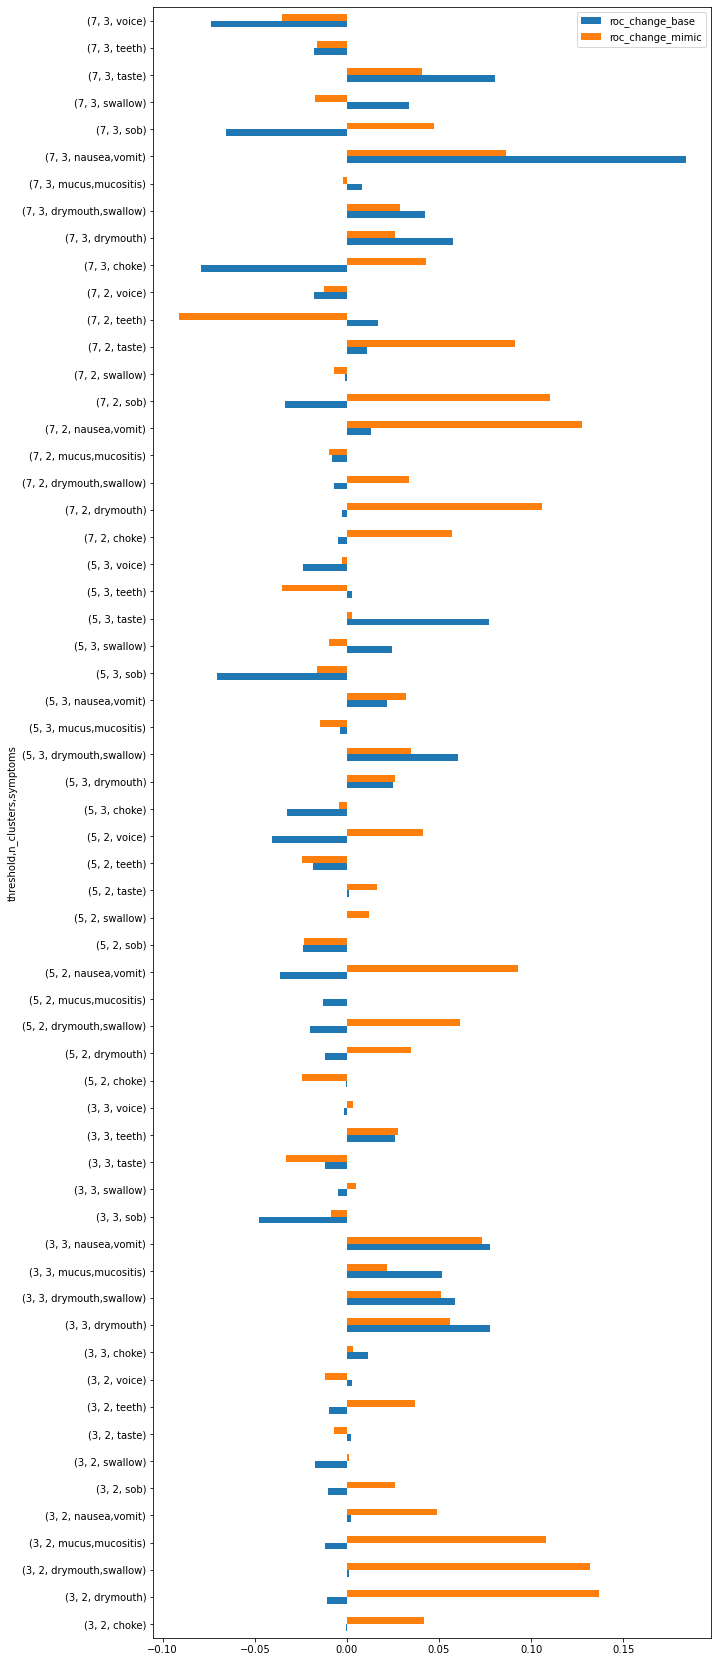

In [182]:
def plot_aucdf(aucdf,key='roc',**kwargs):
    by = ['threshold','n_clusters','symptoms','confounders']
    for k,v in kwargs.items():
        if k in by:
            aucdf = aucdf.drop([k],axis=1)
            by.remove(k)
    aucdf = aucdf.sort_values(key+'_change_base',kind='mergesort',ascending=True)
    stuff = aucdf.groupby(by).first().sort_values(by,axis=0)
    stuff[[key+'_change_base',key+'_change_mimic']].plot(kind='barh',figsize=(10,30))
    return stuff

plot_aucdf(aucdf,'roc', confounders= 't4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit').sort_values('roc_change_base',ascending=False)

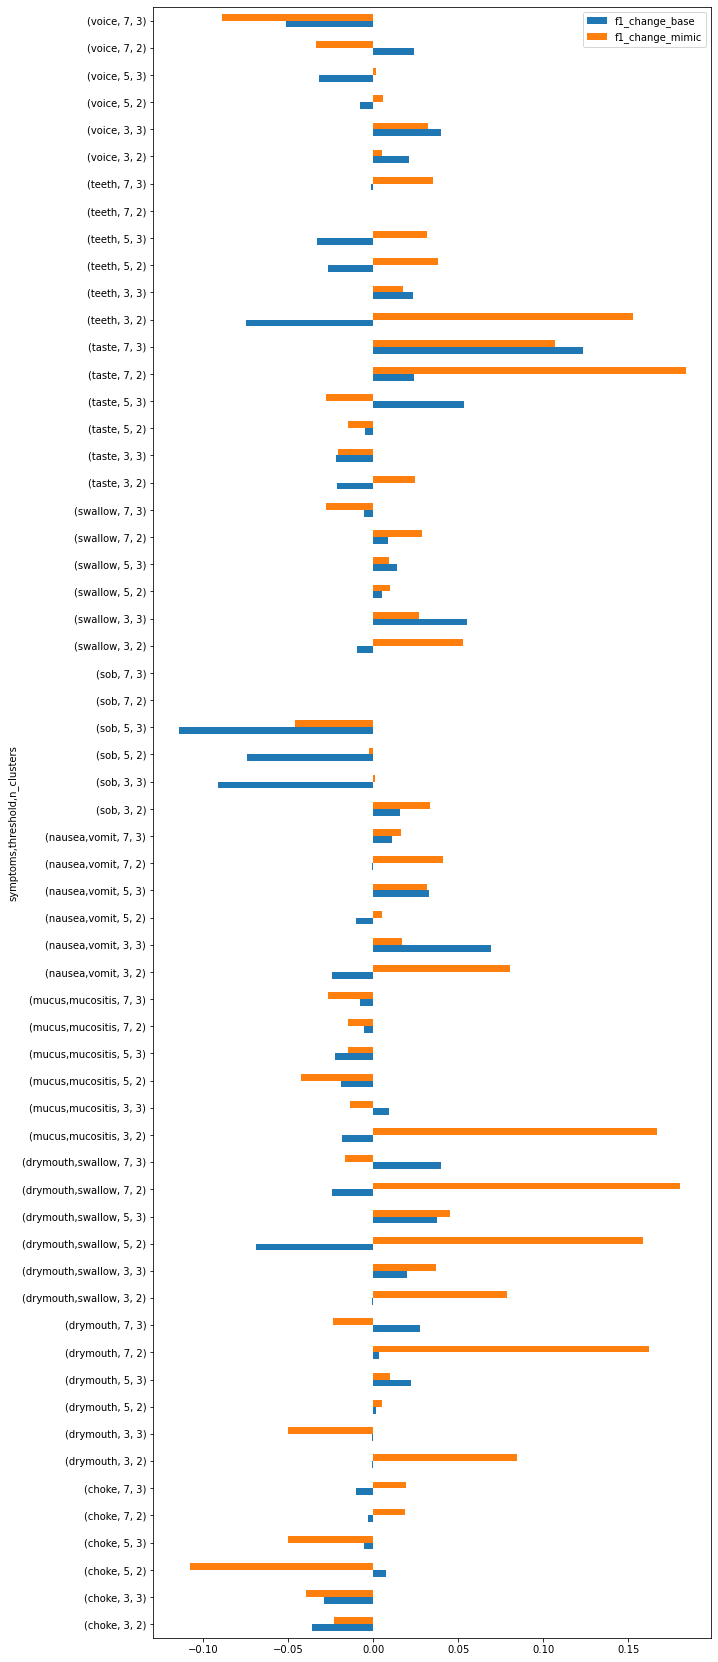

In [177]:
plot_aucdf(aucdf,'f1', confounders= 't4,t3,n_severe,hpv,BOT,Tonsil,Parotid_Gland_limit')

In [86]:
def test_cluster_aucs(df, organlist, symptomlist, 
                      agg_type='mean',#default otherwise is max
                      cluster_sizes = None, 
                      use_mimic=False,
                      featurelist = None, 
                      thresholds=None, 
                      **kwargs):
    results = []
    if cluster_sizes is None:
        cluster_sizes = [2,3,4]
    if thresholds is None:
        thresholds = [3,5,7]
    if featurelist is None:
        featurelist = [
            ['V35','V40','V45','V50','V55'],
            ['V35','V40','V45','V50','V55','V60'],
        ]
    n_runs = 2*len(cluster_sizes)*len(thresholds)*len(organlist)*len(symptomlist)*len(featurelist)
    i=1
    for use_end_cluster in [False,True]:
        for n in cluster_sizes:
            #this flag will only look at the effect of the clustre with the highest dose
            if use_mimic:
                cluster = None
            if not use_mimic and use_end_cluster:
                cluster = n-1
            for thold in thresholds:
                for organs in organlist:
                    for symptoms in symptomlist:
                        for features in featurelist:
                            ct = ClusterTester(df,organs,
                                               symptoms=symptoms,
                                               cluster_features=features,
                                               n_clusters=n,
                                               agg_type=agg_type,
                                               **kwargs)
                            metrics = ct.get_cv_auc(
                                threshold=thold,
                                use_mimic=use_mimic,
                                cluster=cluster
                            )
                            metrics['threshold'] = thold
                            metrics['n_clusters'] = n
                            metrics['symptoms'] = symptoms
                            metrics['organs'] = organs
                            metrics['features']=features
                            metrics['use_end_cluster'] = use_end_cluster
                            print(str(np.round(100*i/n_runs,1)) + '%',end='\r')
                            results.append(metrics)
                            i+=1
    return pd.DataFrame(results)

def plot_auc_results(df,
                     x='n_clusters',
                     y='roc_change',
                     hue='organs',
                     col='threshold',
                     row='symptoms',
                     threshold=None,
                     organs=None,
                     n_clusters=None,
                     symptoms=None,
                     features=None,
                     use_end_cluster=None,
                     kind='bar',
                    ):
    df = df.copy()
    if threshold is not None:
        df = df[df.threshold == threshold]
    if n_clusters is not None:
        df = df[df.n_clusters == n_clusters]
    if use_end_cluster is not None:
        df = df[df.n_clusters == use_end_cluster]
    def make_name(xlist):
        def fix(x):
            for symbol in ['t_','_','\[','\]',"\'"]:
                x = x.replace(symbol,'')
            return x[:2] + x[len(x)-2:]
        xlist = [fix(x) for x in xlist]
        xlist 
    make_name = lambda xlist: '\n'.join([x.replace('_','').replace('\[','').replace('\]','').replace("\'",'')[:2] + x[len(x)-2:] for x in xlist])
    
    df.symptoms = df.symptoms.apply(make_name)
    df.organs = df.organs.apply(make_name)
    df.features = df.features.apply(make_name)
    if symptoms is not None:
        df = df[df.symptoms == make_name(symptoms)]
        
    if organs is not None:
        df = df[df.organs  == make_name(organs)]
    
    if features is not None:
        df = df[df.features == make_name(features)]
    df['combined_name'] = df.organs + '|' + df.features
    
    g=sns.catplot(
        data=df,
        x=x,
        y=y,
        col=col,
        row=row,
        kind=kind,
        hue=hue,
    )
    print('_____________')
    return 

alt_oois = [
    ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
     'Rt_Parotid_Gland','Lt_Parotid_Gland',
     'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
      ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Extended_Oral_Cavity',
#       ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
#       ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
#       'Extended_Oral_Cavity',
#     ],
]
temp_slist = [
    ['drymouth'],
    ['swallow'],
    ['taste'],
    ['teeth'],
    ['choke'],
    ['sob'],
    ['voice'],
    ['nausea','vomit'],
    ['drymouth','swallow'],
    ['mucus','mucositis'],
]

featurelists=[
    ['V35','V40','V45','V50','V55'],
    ['V35','V40','V45','V50'],
    ['V35','V40','V45'],
    ['V40','V45','V50','V55'],
]
# test = test_cluster_aucs(sddf, 
#                          alt_oois, 
#                          symptomlist = temp_slist,
#                          featurelist=featurelists,
#                         )
# filename = Const.data_dir+'model_test_'+timestamp()+'.csv'
# test.to_csv(filename)
test = pd.read_csv(Const.data_dir + 'model_test_202204160555598927.csv')
test['ostring'] = test.organs.apply(lambda x: '|'.join([xx[:7] for xx in x[5:]]))
for m in ['f2','mcc','roc']:
    print('_________')
    print(test[(test.use_end_cluster) & test.symptoms.apply(lambda x: 'drymouth' in x)].sort_values(m+'_change',ascending=False).loc[:,['symptoms','features','ostring',m+'_change',m,'n_clusters']].iloc[0:3,:].T)

_________
                                                         3605  \
symptoms                                         ['drymouth']   
features                                 ['D2', 'D50', 'D99']   
ostring     g|u|e|'|,| |'|G|e|n|i|o|g|l|o|s|s|u|s|_|M|'|,|...   
f2_change                                            0.363022   
f2                                                   0.712121   
n_clusters                                                  2   

                                                         5858  \
symptoms                                         ['drymouth']   
features                          ['D2', 'D10', 'D20', 'D30']   
ostring     g|u|e|'|,| |'|G|e|n|i|o|g|l|o|s|s|u|s|_|M|'|,|...   
f2_change                                            0.360871   
f2                                                    0.70997   
n_clusters                                                  4   

                                                         5768  
symptoms      

_____________


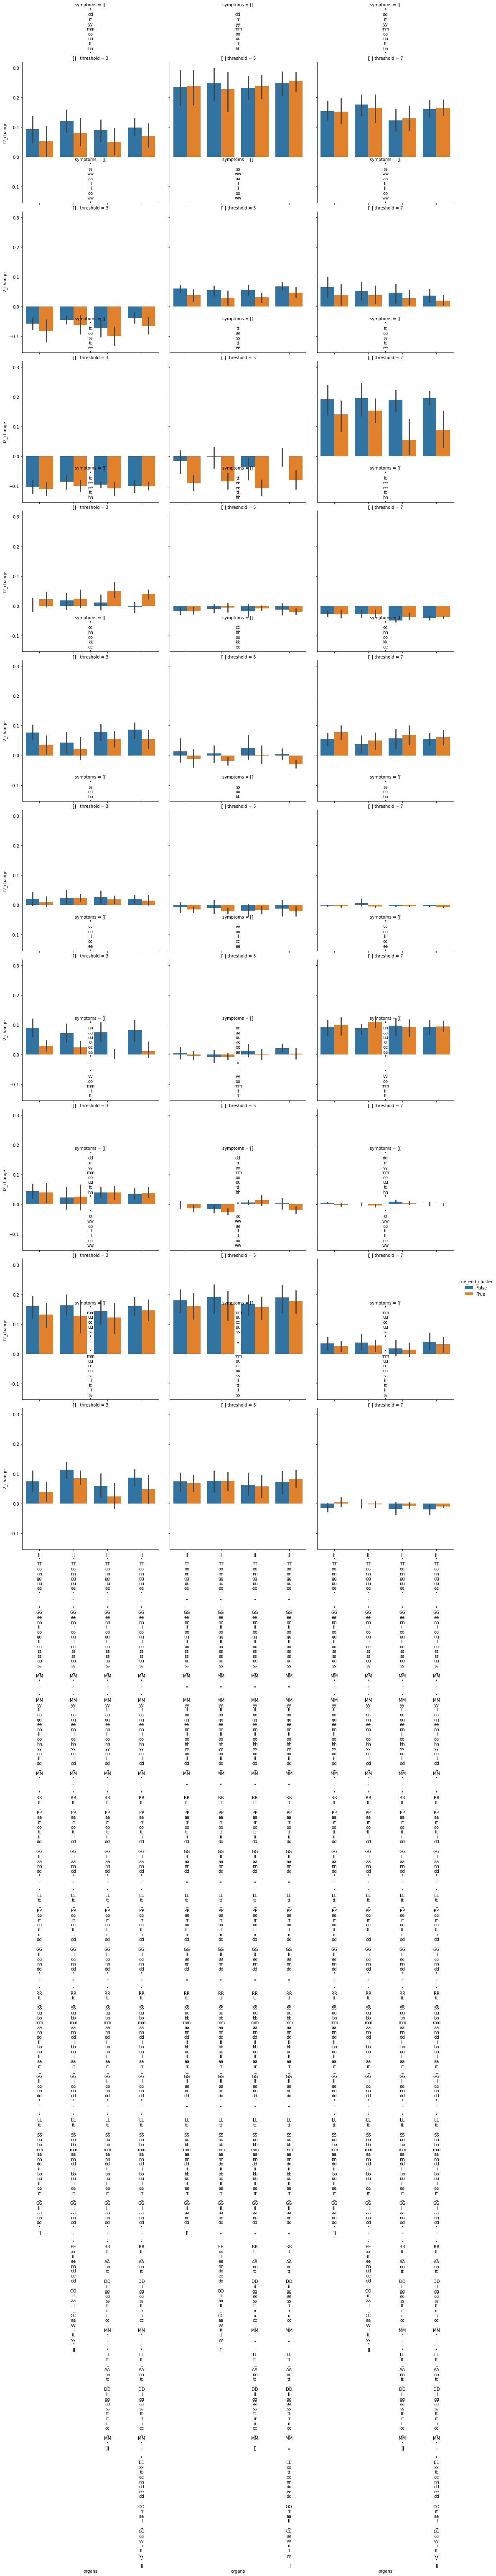

In [87]:
plot_auc_results(test,y='f2_change',hue='use_end_cluster',n_clusters=4,x='organs')

In [ ]:
plot_auc_results(test,y='mcc_change',hue='use_end_cluster',x='organs')

In [ ]:
plot_auc_results(test,y='roc_change',hue='use_end_cluster',x='organs') 

In [ ]:
res = ct.get_ate(n_iters=50,confounder_pval_filter=1,use_dose_confounders=False)
res.sort_values('dr_ate_05',ascending=False)

In [ ]:
get_demographics_table(sddf)

In [ ]:
def run_ate_grid_search(savepath = None):
    if savepath is None:
        savepath = Const.data_dir+'cluster_ate_results_' + timestamp + '.csv'
    organs_of_interest_list = [
        ['Tongue','Genioglossus_M',
         'Rt_Parotid_Gland','Lt_Parotid_Gland',
         'Rt_Submandibular_Gland','Lt_Submandibular_Gland'],
        ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
         'Rt_Parotid_Gland','Lt_Parotid_Gland',
         'Rt_Submandibular_Gland','Lt_Submandibular_Gland'],
    ]
    symptomlist = [
        ['drymouth'],
        ['taste'],
        ['voice'],
        ['nausea'],
        ['choke'],
        ['mucus'],
        ['teeth'],
        ['drymouth','voice','taste','teeth'],
        ['choke','nausea']
    ]
    results = []
    for symptoms in symptomlist:
        for organs_of_interest in organs_of_interest_list:
            try:
                ct = ClusterTester(sddf,organs_of_interest,symptoms=symptoms)
                ate_base = ct.get_ate(n_iters=50,confounder_pval_filter = 1, use_dose_confounders=False)
                ate_alt = ct.get_ate(n_iters=50)
                ate_base['symptoms'] = '_'.join(symptoms)
                ate_alt['symptoms'] = '_'.join(symptoms)
                ate_alt['use_dose'] = False
                ate_base['use_dose'] = True
                ate_alt['organs'] = organs
                ate_base['organs'] = organs
                results.append(ate_base)
                results.append(ate_alt)
                temp = pd.concat(results,axis=0,ignore_index=True)
                temp.to_csv(savepath)
                print(temp.sort_values('dr_ate_05',ascending=False).head())
            except Exception as e:
                print(e)
    return pd.concat(results,axis=0,ignore_index=True)